# Trending YouTube Video Statistics
##### : Daily statistics for trending YouTube videos (2017-18) ------ by Sakshi Maharana

### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

### Content
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, IN, DE, CA, and FR regions (USA, Great Britain, India, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

### Description
The dataset includes data gathered from videos on YouTube that are contained within the trending category each day. There are two kinds of data files, one includes comments and one includes video statistics. They are linked by the unique video_id field.

The headers in the video file are:

    video_id (Common id field to both comment and video csv files)
    title
    channel_title
    category_id (Can be looked up using the included JSON files, but varies per region so use the appropriate JSON file for the CSV file's country)
    tags (Separated by | character, [none] is displayed if there are no tags)
    views
    likes
    dislikes
    thumbnail_link
    date (Formatted like so: [day].[month])

The headers in the comments file are:

    video_id (Common id field to both comment and video csv files)
    comment_text
    likes
    replies
    
Extra info: The YouTube API is not effective at formatting comments by relevance, although it claims to do so. As a result, the most relevant comments do not align with the top comments at all, they aren't even sorted by likes or replies.

### Acknowledgements
This dataset was collected from Kaggle data. The information is same as that mentioned in the Kaggle Task window for the same.

### Reference Links

    1. https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda
    2. https://www.kaggle.com/ankkur13/sentiment-analysis-nlp-wordcloud-textblob 
    3. https://www.kaggle.com/somang1418/youtube-video-title-generator-by-lstm-eda#Finding-Outlier-Youtube-Video 
    4. https://www.kaggle.com/ammar111/youtube-trending-videos-analysis 

### Inspiration
Possible uses for this dataset could include:

    * Sentiment analysis in a variety of forms.
    * Categorising YouTube videos based on their comments and statistics.
    * Training ML algorithms like RNNs to generate their own YouTube comments.
    * Analysing what factors affect how popular a YouTube video will be.
    * Statistical analysis over time.
    
### Index 
The steps followed in the code to follow the outcome :-

    1. Importing Libraries
    2. Loading Dataset
    3. Understanding the dataset
    4. Data Cleaning
    5. Data Preparation
    6. Exploratory Data Analysis based on statistics
    7. Sentiment Analysis
    8. Insights Conclusion
    
    
### Aim 
The main focus in this project is based under following points :-

    # Analysing what factors affect how popular a YouTube video will be.
    # Trying sentiment analysis in a variety of forms.


Let's do it!!!!!!

##### IMPORTING LIBRARIES

Installation Required

In [1]:
#pip install wordcloud

In [2]:
#pip install stop-words

In [3]:
#pip install textblob

In [4]:
#pip install pyspellchecker

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Libraries imported

In [7]:
#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns

import os

import re
from textblob import TextBlob
from textblob import classifiers
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from spellchecker import SpellChecker
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [8]:
###### encoded files
#ca_trend = pd.read_csv("./youtube/CAvideos.csv")
#de_trend = pd.read_csv("./youtube/DEvideos.csv")
#fr_trend = pd.read_csv("./youtube/FRvideos.csv")
#gb_trend = pd.read_csv("./youtube/GBvideos.csv")
#in_trend = pd.read_csv("./youtube/INvideos.csv")
#us_trend = pd.read_csv("./youtube/USvideos.csv")

###### unencoded files
##jp_trend = pd.read_csv("./youtube/JPvideos.csv")
##kr_trend = pd.read_csv("./youtube/KRvideos.csv")
##mx_trend = pd.read_csv("./youtube/MXvideos.csv")
##ru_trend = pd.read_csv("./youtube/RUvideos.csv")

##### LOADING DATASET

In [9]:
csv_files = [i for i in glob.glob(r'.\youtube\*.{}'.format('csv'))]
sorted(csv_files)

['.\\youtube\\CAvideos.csv',
 '.\\youtube\\DEvideos.csv',
 '.\\youtube\\FRvideos.csv',
 '.\\youtube\\GBvideos.csv',
 '.\\youtube\\INvideos.csv',
 '.\\youtube\\USvideos.csv']

In [10]:
json_files = [i for i in glob.glob(r'.\youtube\*.{}'.format('json'))]
sorted(json_files)

['.\\youtube\\CA_category_id.json',
 '.\\youtube\\DE_category_id.json',
 '.\\youtube\\FR_category_id.json',
 '.\\youtube\\GB_category_id.json',
 '.\\youtube\\IN_category_id.json',
 '.\\youtube\\US_category_id.json']

In [11]:
video_dfs = list()
for csv in csv_files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[10:12]
    video_dfs.append(df)

youtube = pd.concat(video_dfs)
youtube.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


##### UNDERSTANDING THE DATASET

In [12]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239662 entries, n1WpP7iowLc to ooyjaVdt-jA
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           239662 non-null  object
 1   title                   239662 non-null  object
 2   channel_title           239662 non-null  object
 3   category_id             239662 non-null  int64 
 4   publish_time            239662 non-null  object
 5   tags                    239662 non-null  object
 6   views                   239662 non-null  int64 
 7   likes                   239662 non-null  int64 
 8   dislikes                239662 non-null  int64 
 9   comment_count           239662 non-null  int64 
 10  thumbnail_link          239662 non-null  object
 11  comments_disabled       239662 non-null  bool  
 12  ratings_disabled        239662 non-null  bool  
 13  video_error_or_removed  239662 non-null  bool  
 14  description             23

In [13]:
youtube.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               7503
country                      0
dtype: int64

In [14]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,239662.000000,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,20.002950,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
std,7.271423,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,24.000000,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,24.000000,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [15]:
#null values on percentage wise
print(round(100*(youtube.isnull().sum()/len(youtube.index)), 2))

trending_date             0.00
title                     0.00
channel_title             0.00
category_id               0.00
publish_time              0.00
tags                      0.00
views                     0.00
likes                     0.00
dislikes                  0.00
comment_count             0.00
thumbnail_link            0.00
comments_disabled         0.00
ratings_disabled          0.00
video_error_or_removed    0.00
description               3.13
country                   0.00
dtype: float64


##### DATA CLEANING

In [16]:
col0 = youtube.description.unique()
print("COLUMN - description :", col0)

COLUMN - description : ["Eminem's new track Walk on Water ft. Beyoncé is available everywhere: http://shady.sr/WOWEminem \\nPlaylist Best of Eminem: https://goo.gl/AquNpo\\nSubscribe for more: https://goo.gl/DxCrDV\\n\\nFor more visit: \\nhttp://eminem.com\\nhttp://facebook.com/eminem\\nhttp://twitter.com/eminem\\nhttp://instagram.com/eminem\\nhttp://eminem.tumblr.com\\nhttp://shadyrecords.com\\nhttp://facebook.com/shadyrecords\\nhttp://twitter.com/shadyrecords\\nhttp://instagram.com/shadyrecords\\nhttp://trustshady.tumblr.com\\n\\nMusic video by Eminem performing Walk On Water. (C) 2017 Aftermath Records\\nhttp://vevo.ly/gA7xKt"
 "STill got a lot of packages. Probably will last for another year. On a side note, more 2nd channel vids soon. editing with premiere from now on, gon' be a tedious transition, but i think it's for the best. \\n\\n__\\n\\nSUBSCRIBE ► http://www.youtube.com/subscription_center?add_user=iDubbbztv\\n\\nMain Channel ► https://www.youtube.com/user/iDubbbzTV\\nSecon

In [17]:
#replacing all the unwanted null values as "na"
youtube["description"] = youtube["description"].fillna('')

In [18]:
#null values on percentage wise
print(round(100*(youtube.isnull().sum()/len(youtube.index)), 2))

trending_date             0.0
title                     0.0
channel_title             0.0
category_id               0.0
publish_time              0.0
tags                      0.0
views                     0.0
likes                     0.0
dislikes                  0.0
comment_count             0.0
thumbnail_link            0.0
comments_disabled         0.0
ratings_disabled          0.0
video_error_or_removed    0.0
description               0.0
country                   0.0
dtype: float64


In [19]:
youtube.dtypes

trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [20]:
# convert the dates column to datetime format
# format in multiple columns
youtube['trending_date'] = pd.to_datetime(
                          youtube['trending_date'],
                          format='%y.%d.%m'
)

youtube['publish_time'] = pd.to_datetime(
                          youtube['publish_time'],
                          format='%Y-%m-%dT%H:%M:%S.%f%z'
)

youtube.dtypes

trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
country                                object
dtype: object

In [21]:
#give you a report of distribution of data/correlation
import pandas_profiling as pp

pp.ProfileReport(youtube[['views','likes','dislikes','comment_count']])

##### DATA PREPARATION

In [22]:
Q1 = youtube.views.quantile(0.25)
Q3 = youtube.views.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popular_videos = youtube.loc[youtube.views > (Q3 + 1.5 * IQR)]

youtube['popular'] = 0
youtube.loc[youtube.views > (Q3 + 1.5 * IQR),'popular'] = 1

youtube['popular'].value_counts()

957780.0


0    209376
1     30286
Name: popular, dtype: int64

In [23]:
#make a variable that tells ratio of like and dislike
youtube['like_percentage'] = (youtube['likes'] / (youtube['likes'] + youtube['dislikes'])*100)

In [24]:
youtube.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,popular,like_percentage
video_id,,,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,1,94.773995
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,0,98.696344
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,1,96.472974
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,0,98.518193
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,1,98.726326


In [25]:
youtube = youtube[youtube['trending_date'].notnull()]
youtube = youtube[youtube['publish_time'].notnull()]

youtube = youtube.dropna(how='any',inplace=False, axis = 0)

youtube.insert(4, 'publish_date', youtube['publish_time'].dt.date)
youtube['publish_time'] = youtube['publish_time'].dt.time

yt_df = youtube.reset_index().sort_values('trending_date').set_index('video_id')
youtube = youtube.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
youtube[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
IE-xepGLVt8,2017-11-10,12:04:17
cOc3tsFWoRs,2017-11-10,09:35:00
Om_zGhJLZ5U,2017-11-12,18:00:03
goP4Z5wyOlM,2017-11-12,21:16:40
k29YnfttqEU,2017-11-09,04:58:04


In [26]:
youtube['category_id'] = youtube['category_id'].astype(str)
yt_df['category_id'] = youtube['category_id'].astype(str)

category_id = {}

for js in json_files:
    with open(js, 'r') as f:
        data = json.load(f)
        for category in data['items']:
            category_id[category['id']] = category['snippet']['title']

youtube.insert(4, 'category', youtube['category_id'].map(category_id))
yt_df.insert(4, 'category', yt_df['category_id'].map(category_id))
category_list = youtube['category'].unique()
category_list

array(['Science & Technology', 'Entertainment', 'Film & Animation',
       'News & Politics', 'Comedy', 'Music', 'People & Blogs', 'Sports',
       'Education', 'Gaming', 'Autos & Vehicles', 'Howto & Style',
       'Shows', 'Pets & Animals', 'Nonprofits & Activism',
       'Travel & Events', 'Movies', 'Trailers'], dtype=object)

In [27]:
like_dislike_ratio = youtube.groupby('category')['likes'].agg('sum') / youtube.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
like_dislike_ratio

,category,ratio
0,Pets & Animals,40.627560
1,Autos & Vehicles,29.356885
2,Comedy,29.198438
3,Howto & Style,26.748879
4,Education,24.941049
5,Travel & Events,24.938707
6,Science & Technology,22.568432
7,Music,21.998134
8,Gaming,21.647992
9,Film & Animation,18.927869


In [28]:
views_comment_ratio = youtube.groupby('category')['views'].agg('sum') / youtube.groupby('category')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','ratio']
views_comment_ratio

,category,ratio
0,Trailers,inf
1,Movies,1606.831515
2,Shows,940.276885
3,Music,569.812569
4,Sports,477.974961
5,Film & Animation,444.366979
6,Travel & Events,321.385922
7,Entertainment,310.958660
8,People & Blogs,264.947506
9,Autos & Vehicles,258.199666


In [29]:
view_dislike_ratio = youtube.groupby('category')['dislikes'].agg('sum') / youtube.groupby('category')['views'].agg('sum')
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
view_dislike_ratio

,category,ratio
0,Nonprofits & Activism,0.023344
1,People & Blogs,0.002073
2,News & Politics,0.002026
3,Gaming,0.001919
4,Entertainment,0.001774
5,Shows,0.001697
6,Comedy,0.001624
7,Science & Technology,0.001540
8,Education,0.001511
9,Howto & Style,0.001173


In [30]:
view_like_ratio = youtube.groupby('category')['likes'].agg('sum') / youtube.groupby('category')['views'].agg('sum')
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
view_like_ratio

,category,ratio
0,Nonprofits & Activism,0.074052
1,Comedy,0.047409
2,Gaming,0.041551
3,Education,0.037683
4,Science & Technology,0.034747
5,Howto & Style,0.031387
6,Pets & Animals,0.031271
7,Autos & Vehicles,0.026775
8,People & Blogs,0.026032
9,Entertainment,0.023715


In [31]:
youtube.head(6)

,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,popular,like_percentage
video_id,,,,,,,,,,,,,,,,,,,,
IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...,US,0,96.243655
cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...,US,0,97.773854
Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,US,0,90.465872
goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,2017-11-12,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,US,0,92.215569
k29YnfttqEU,2017-11-14,Mean Tweets – Country Music Edition #3,Jimmy Kimmel Live,23,Comedy,2017-11-09,04:58:04,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1315873,9312,584,769,https://i.ytimg.com/vi/k29YnfttqEU/default.jpg,False,False,False,"From time to time, we like to shine a light on...",US,0,94.098626
htvR_dBs3eg,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,10,Music,2017-11-10,21:38:57,"album|""review""|""music""|""reviews""|""indie""|""unde...",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=J_ub7E...,US,0,96.503958


In [32]:
youtube.shape

(92373, 20)

In [33]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92373 entries, IE-xepGLVt8 to ooyjaVdt-jA
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           92373 non-null  datetime64[ns]
 1   title                   92373 non-null  object        
 2   channel_title           92373 non-null  object        
 3   category_id             92373 non-null  object        
 4   category                92373 non-null  object        
 5   publish_date            92373 non-null  object        
 6   publish_time            92373 non-null  object        
 7   tags                    92373 non-null  object        
 8   views                   92373 non-null  int64         
 9   likes                   92373 non-null  int64         
 10  dislikes                92373 non-null  int64         
 11  comment_count           92373 non-null  int64         
 12  thumbnail_link          92373 non-n

In [34]:
#null values on percentage wise
#print(round(100*(youtube.isnull().sum()/len(youtube.index)), 2))

In [35]:
#replacing all the unwanted null values as "na"
#youtube["like_percentage"] = youtube["like_percentage"].fillna('00')

#null values on percentage wise
#print(round(100*(youtube.isnull().sum()/len(youtube.index)), 2))

In [36]:
youtube.shape

(92373, 20)

In [37]:
youtube.describe()

,views,likes,dislikes,comment_count,popular,like_percentage
count,9.237300e+04,9.237300e+04,9.237300e+04,9.237300e+04,92373.000000,92373.000000
mean,5.385169e+05,1.346731e+04,7.875592e+02,1.625202e+03,0.030929,91.063869
std,3.905567e+06,7.116973e+04,1.029482e+04,1.122441e+04,0.173126,11.226296
min,2.840000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.879600e+04,4.380000e+02,2.700000e+01,6.200000e+01,0.000000,88.757396
50%,1.116190e+05,1.932000e+03,1.060000e+02,2.730000e+02,0.000000,95.118018
75%,3.516180e+05,7.508000e+03,3.640000e+02,9.860000e+02,0.000000,97.886314
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,1.000000,100.000000


In [38]:
youtube.head(3)

,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,popular,like_percentage
video_id,,,,,,,,,,,,,,,,,,,,
IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...,US,0,96.243655
cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...,US,0,97.773854
Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,US,0,90.465872


In [39]:
youtube.columns

Index(['trending_date', 'title', 'channel_title', 'category_id', 'category',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'country',
       'popular', 'like_percentage'],
      dtype='object')

In [40]:
youtube['ratings_disabled'].value_counts()

False    92373
Name: ratings_disabled, dtype: int64

In [41]:
youtube['video_error_or_removed'].value_counts()

False    92334
True        39
Name: video_error_or_removed, dtype: int64

In [42]:
#removing unwanted columns
youtube.drop(['category_id', 'ratings_disabled'], axis = 1, inplace = True)
youtube.head(3)

,trending_date,title,channel_title,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,video_error_or_removed,description,country,popular,like_percentage
video_id,,,,,,,,,,,,,,,,,,
IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,One and a half years after the surgery that tr...,US,0,96.243655
cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,James congratulates Jason Momoa on recently ma...,US,0,97.773854
Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,With Justice League approaching fast we rewatc...,US,0,90.465872


In [43]:
youtube.shape

(92373, 18)

##### EXPLORATORY DATA ANALYSIS

###### Univariate analysis

In [44]:
def distplot_check(column):
    
    #taking log of the values in both the axes
    youtube[column] = np.log1p(youtube[column])
    
    plt.title('Checking Outliers with distplot()')
    sns.distplot(youtube[column], bins=10)
    plt.show()

In [45]:
#distplot_check('popular')

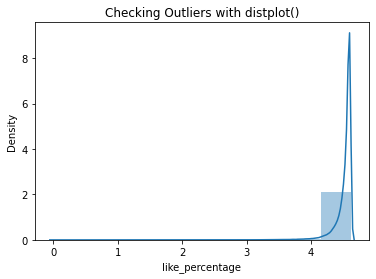

In [46]:
distplot_check('like_percentage')

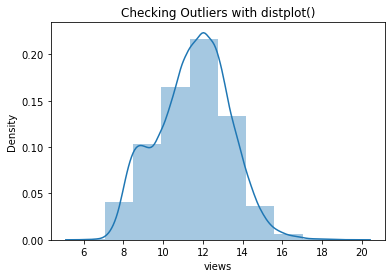

In [47]:
distplot_check('views')

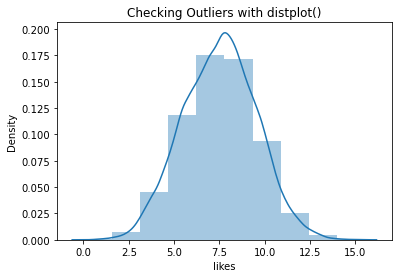

In [48]:
distplot_check('likes')

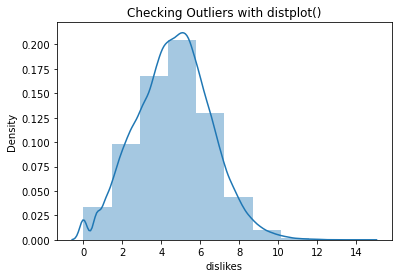

In [49]:
distplot_check('dislikes')

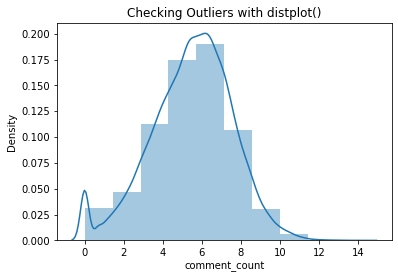

In [50]:
distplot_check('comment_count')

###### Heatmap of all the variables in the dataset

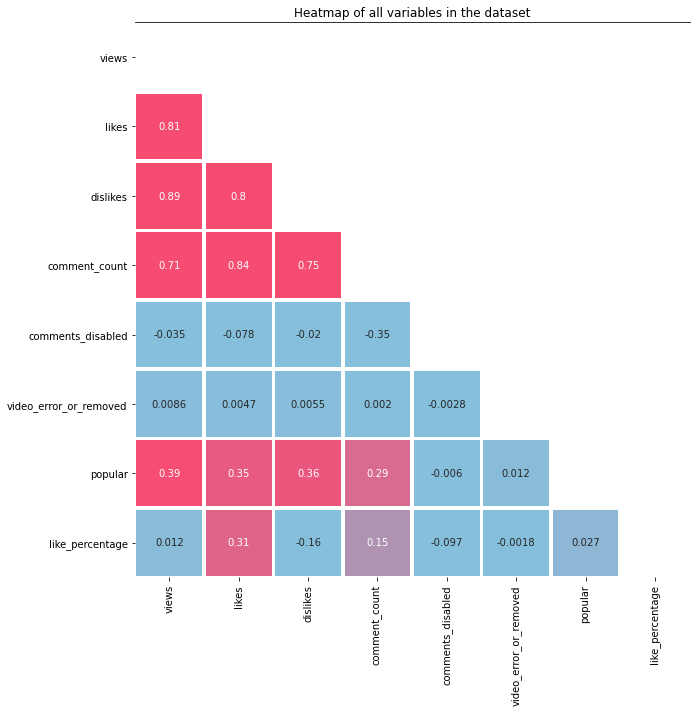

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
df_cor = youtube.corr()

half = np.triu(np.ones_like(df_cor, dtype=np.bool))

my_colors = ['#85bfdc','#f64c72']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', my_colors)

heatmap = sns.heatmap(df_cor, 
            square=True, 
            mask=half,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

heatmap.set(title="Heatmap of all variables in the dataset")
heatmap.set_yticklabels(heatmap.get_xticklabels(), rotation = 0)
heatmap.spines['top'].set_visible(True)

plt.tight_layout()

###### Customizing pie chart as per country based on its title

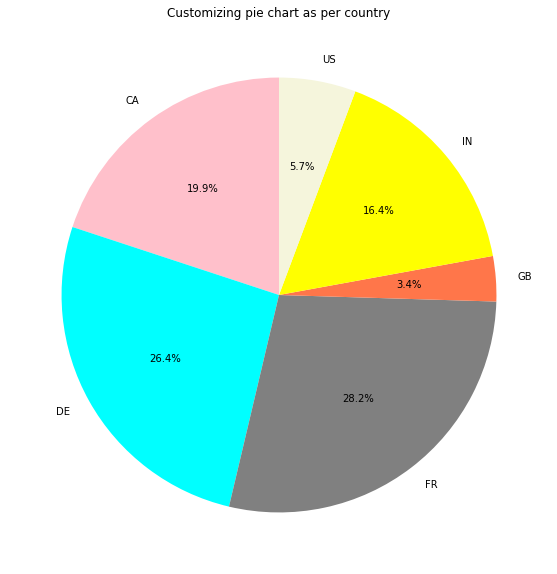

In [52]:
# defining labels
labs = youtube.groupby(['country']).count().index

# data values to be kept in the pie chart
data_values = youtube.groupby(['country']).count()['title']

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
  
# Creating color parameters
colors = ( "pink", "cyan", "grey", "#ff764a", "yellow", "beige")
    
# Creating plot
fig, ax = plt.subplots(figsize =(10, 10))
ax.pie(data_values, 
            autopct = '%1.1f%%',
            explode = explode, 
            labels = labs,
            shadow = False,
            colors = colors,
            startangle = 90,
            textprops = dict(color ="black"))
  
ax.set_title("Customizing pie chart as per country")
  
# show plot
plt.show()

###### Target Distribution : How much popular data we have??

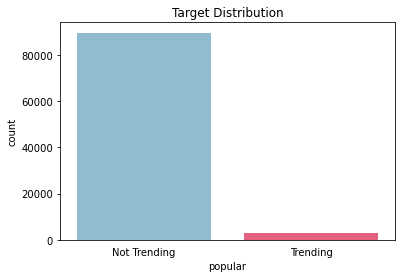

In [53]:
#analysis of the output variable : how much popular data we have
ax = sns.countplot(data = youtube,  x = 'popular', palette = ['#85bfdc','#f64c72'])
ax.set(xticklabels = ['Not Trending', 'Trending'], title = "Target Distribution")
ax.tick_params(bottom = False)

In [54]:
youtube.columns

Index(['trending_date', 'title', 'channel_title', 'category', 'publish_date',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'video_error_or_removed',
       'description', 'country', 'popular', 'like_percentage'],
      dtype='object')

###### Which country has the largest popular videos??

Output if --
*1 : Popular
*0 : Not Popular


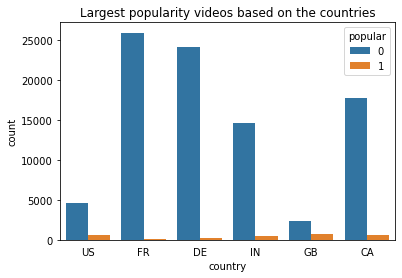

In [55]:
#analysis of the country variable : which country has the largest popularity videos
ax = sns.countplot(data = youtube, x = 'country', hue = 'popular')
ax.set(title = "Largest popularity videos based on the countries")
ax.tick_params(bottom = False)

#index
print("Output if --\n*1 : Popular\n*0 : Not Popular")

Output if --
*1 : Popular
*0 : Not Popular


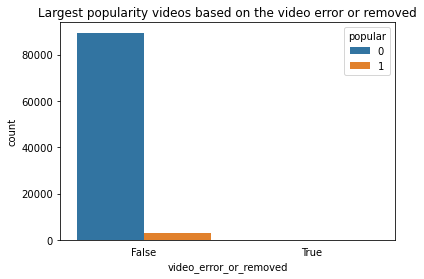

In [56]:
#analysis of the country variable : will video error or removed have the largest popularity videos
ax = sns.countplot(data = youtube, x = 'video_error_or_removed', hue = 'popular')
ax.set(title = "Largest popularity videos based on the video error or removed")
ax.tick_params(bottom = False)

#index
print("Output if --\n*1 : Popular\n*0 : Not Popular")

Output if --
*1 : Popular
*0 : Not Popular


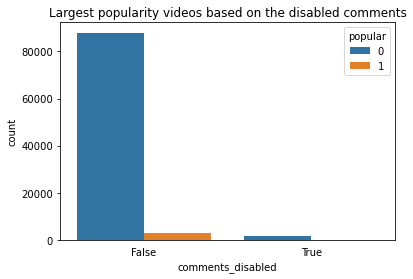

In [57]:
#analysis of the country variable : which disabled comments have the largest popularity videos
ax = sns.countplot(data = youtube, x = 'comments_disabled', hue = 'popular')
ax.set(title = "Largest popularity videos based on the disabled comments")
ax.tick_params(bottom = False)

#index
print("Output if --\n*1 : Popular\n*0 : Not Popular")

###### Which category has the largest popular videos??

Output if --
*1 : Popular
*0 : Not Popular


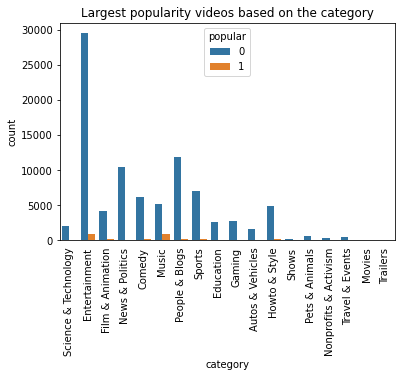

In [58]:
#analysis of the country variable : which category has the largest popularity videos
ax = sns.countplot(data = youtube, x = 'category', hue = 'popular')
ax.set(title = "Largest popularity videos based on the category")
ax.tick_params(bottom = False)
plt.xticks(rotation=90)

#index
print("Output if --\n*1 : Popular\n*0 : Not Popular")

###### Views/Dislikes/Likes/Comment Counts VS Countries

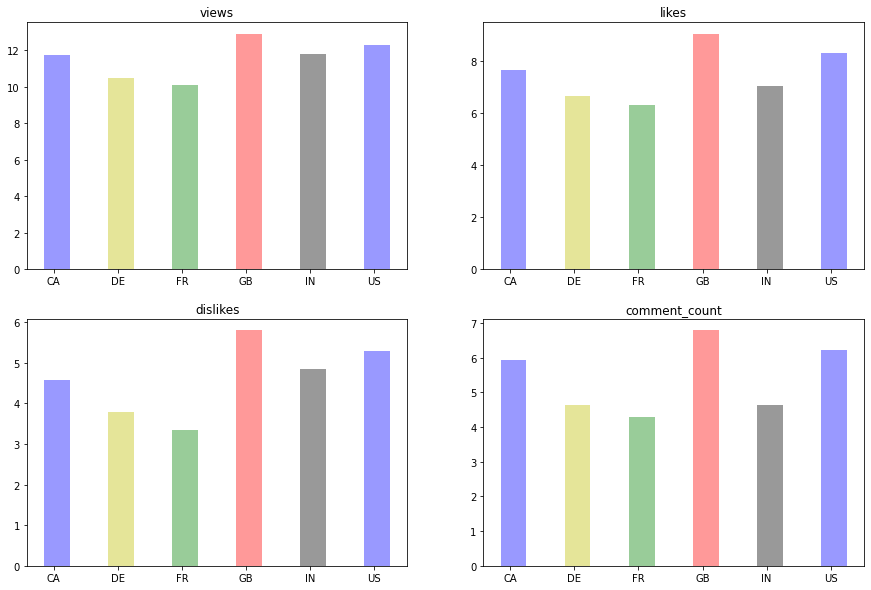

In [59]:
to_int = ['views', 'likes', 'dislikes', 'comment_count']
country_list = youtube.groupby(['country']).count().index

for column in to_int:
    youtube[column] = youtube[column].astype(int)
    
measures = list()
n_groups = len(country_list)

for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append(youtube[youtube['country']==c][typ].agg('sum')/len(youtube[youtube['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=['b','y','g','r','k'],
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)

###### Trending Year

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'No. of videos')]

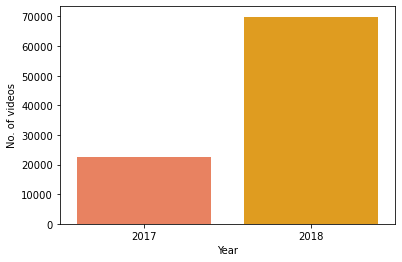

In [60]:
year_df = youtube["trending_date"].dt.year.value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
sns.barplot(x="year", y="No_of_videos", data=year_df, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)

ax.set(xlabel="Year", ylabel="No. of videos")

###### Countries VS Categories

In [61]:
def cat_by_cntry(cntry, cntry_name):
    
    cat_df = youtube[youtube['country']==cntry]['category'].value_counts().reset_index()
    plt.figure(figsize=(15,10))
    sns.set_style("whitegrid")
    ax = sns.barplot(y=cat_df['index'], x=cat_df['category'], data=cat_df, orient='h')
    plt.xlabel("Number of Videos") 
    plt.ylabel("Categories")
    plt.title(label = "Categories of trend videos in " + cntry_name,
             fontsize = 20, color = "black")
    plt.show()

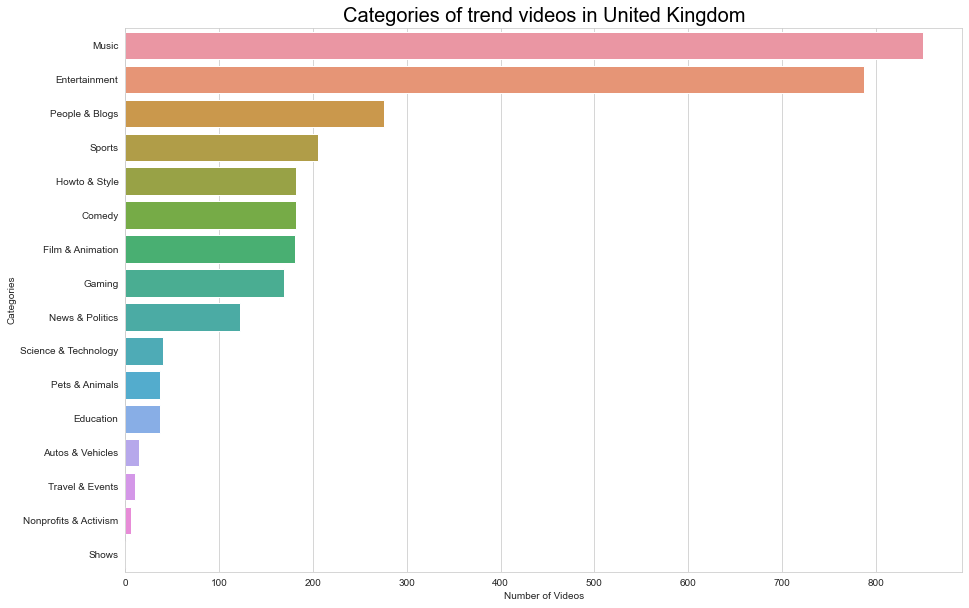

In [62]:
cat_by_cntry('GB', 'United Kingdom')

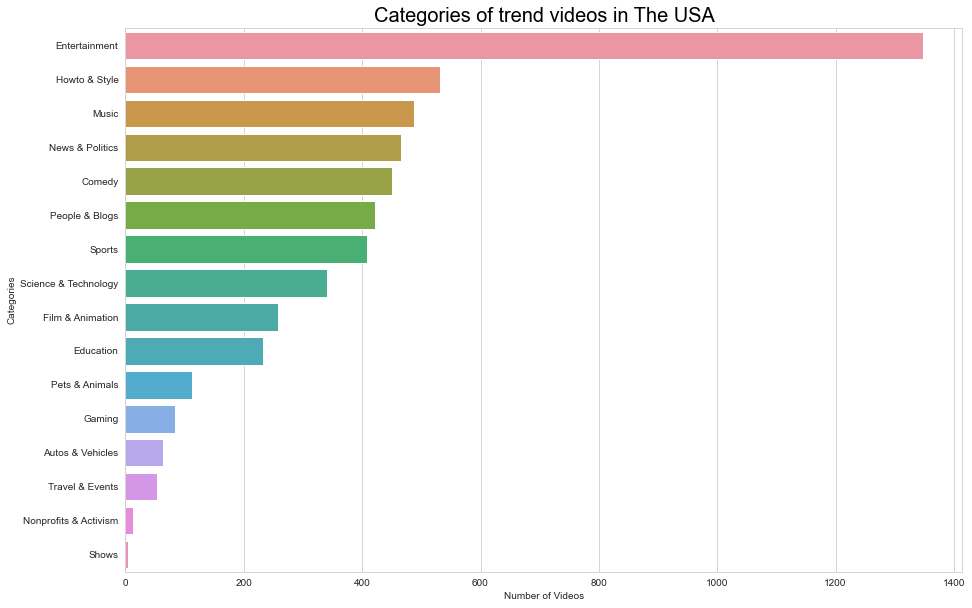

In [63]:
cat_by_cntry('US', 'The USA')

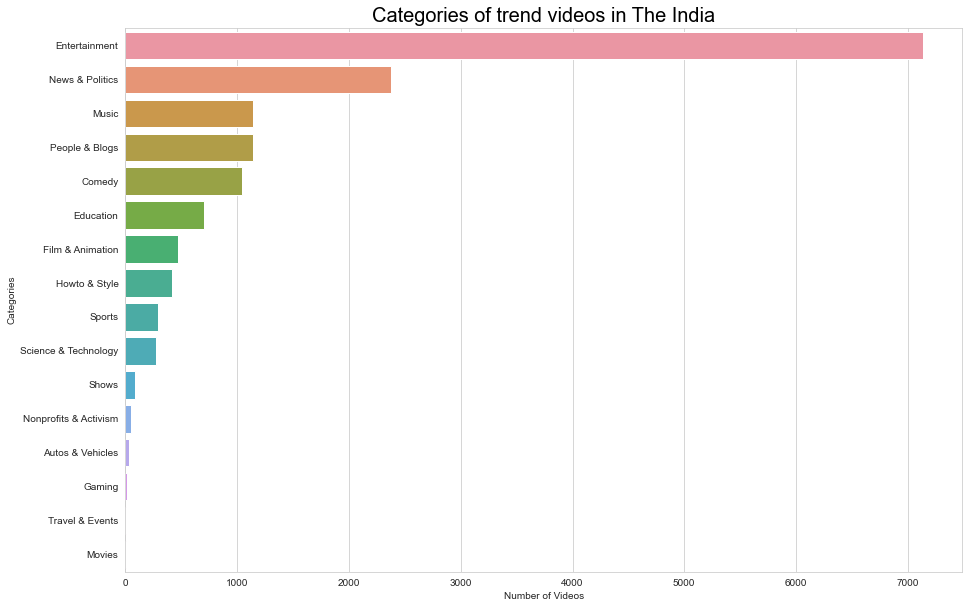

In [64]:
cat_by_cntry('IN', 'The India')

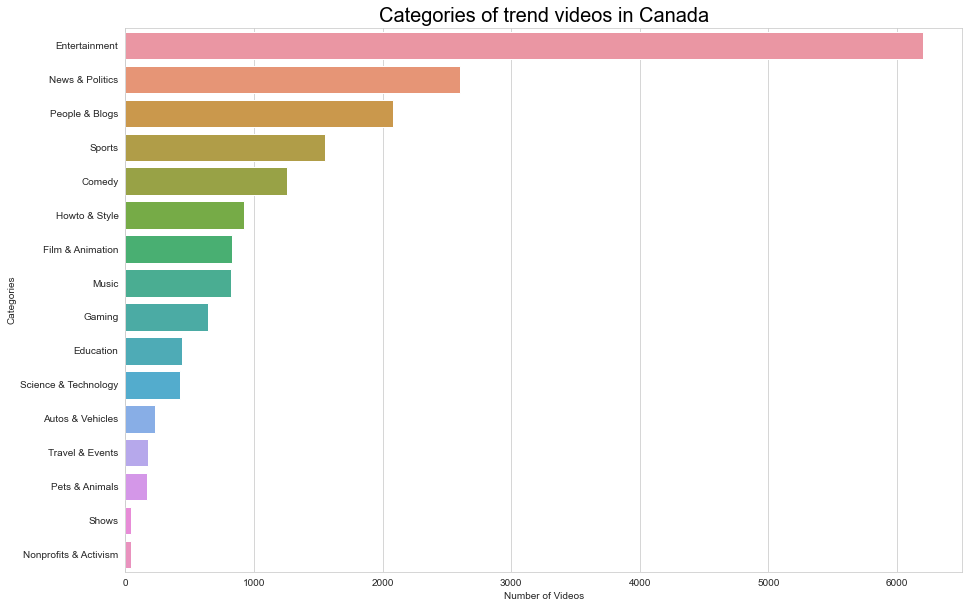

In [65]:
cat_by_cntry('CA', 'Canada')

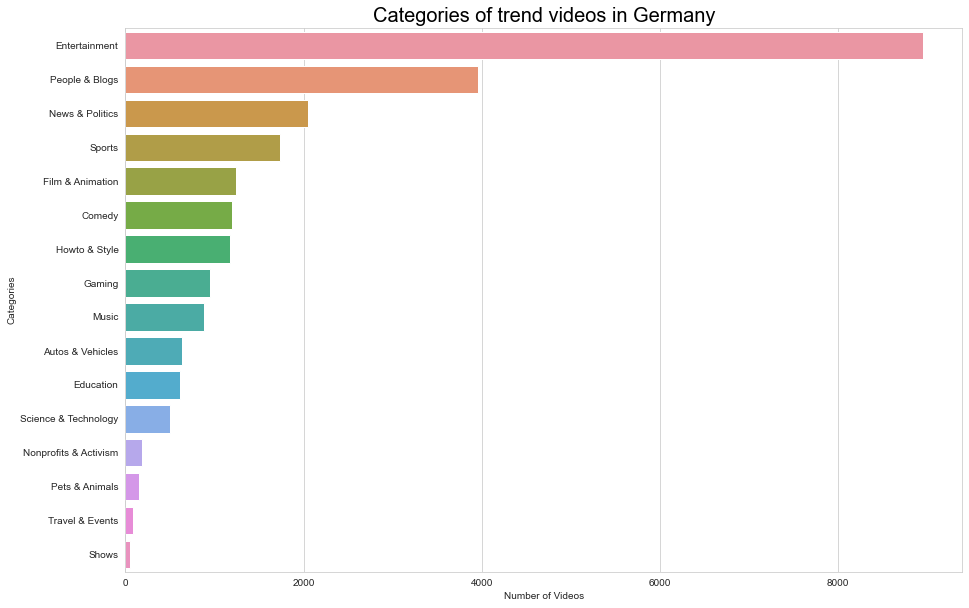

In [66]:
cat_by_cntry('DE', 'Germany')

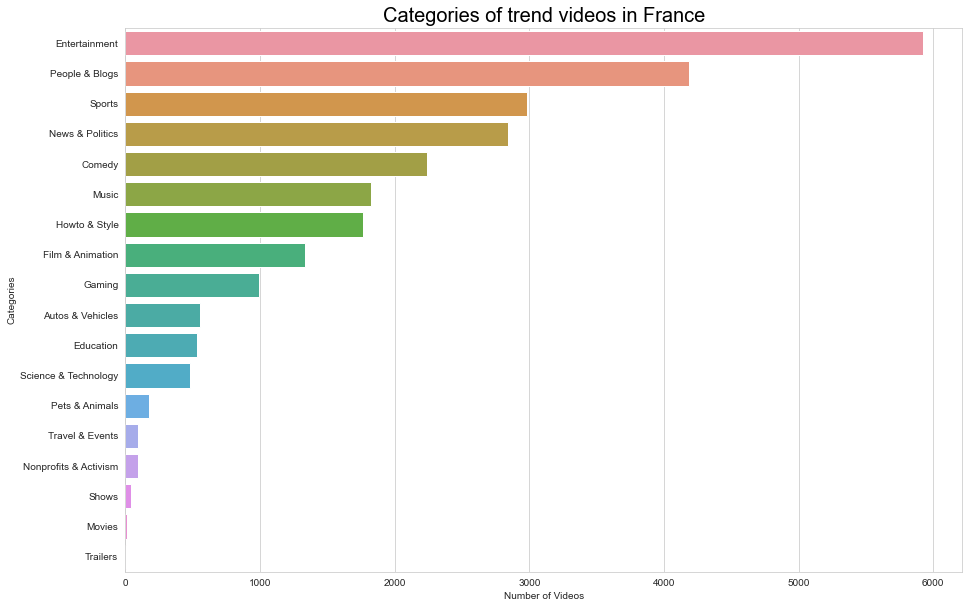

In [67]:
cat_by_cntry('FR', 'France')

###### Single Day Trending videos

In [68]:
youtube.head(3)

,trending_date,title,channel_title,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,video_error_or_removed,description,country,popular,like_percentage
video_id,,,,,,,,,,,,,,,,,,
IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",12,7,4,5,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,One and a half years after the surgery that tr...,US,0,4.577220
cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",14,9,5,6,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,James congratulates Jason Momoa on recently ma...,US,0,4.592833
Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",12,8,6,7,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,With Justice League approaching fast we rewatc...,US,0,4.515966


In [69]:
# remove own index with default index
youtube.reset_index(inplace = True)
youtube.head(3)

,video_id,trending_date,title,channel_title,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,video_error_or_removed,description,country,popular,like_percentage
0,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",12,7,4,5,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,One and a half years after the surgery that tr...,US,0,4.577220
1,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",14,9,5,6,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,James congratulates Jason Momoa on recently ma...,US,0,4.592833
2,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",12,8,6,7,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,With Justice League approaching fast we rewatc...,US,0,4.515966


In [70]:
yt_video_views = youtube.groupby(['video_id'])['views'].agg('sum')
yt_video_likes = youtube.groupby(['video_id'])['likes'].agg('sum')
yt_video_dislikes = youtube.groupby(['video_id'])['dislikes'].agg('sum')
yt_video_comment_count = youtube.groupby(['video_id'])['comment_count'].agg('sum')

In [71]:
#df_single_day_trend = youtube.drop_duplicates(subset = 'video_id', keep=False, inplace=False)
#df_multiple_day_trend = youtube.drop_duplicates(subset = 'video_id', keep= 'first', inplace=False)

#frames = [df_single_day_trend, df_multiple_day_trend]
#df_without_duplicates = pd.concat(frames)

#df_comment_disabled = df_without_duplicates[df_without_duplicates['comments_disabled']==True].describe()
#df_video_error = df_without_duplicates[df_without_duplicates['video_error_or_removed']==True].describe()

####### SINGLE DAY TRENDING VIDEOS by EACH COUNTRY #######

In [72]:
def single_day_trend_by(cn):
    df_single_day_trend = youtube[(youtube['country'] == cn)].drop_duplicates(subset = 'video_id', 
                                                                              keep=False, 
                                                                              inplace=False)
    
    cn_single_day_trend = df_single_day_trend[(df_single_day_trend['country'] == cn) & 
                                                  (df_single_day_trend['popular'] == 1) ]
    
    print("Total number of Trending Videos in {} - {}".format(cn, cn_single_day_trend.shape[0]))

In [73]:
single_day_trend_by('GB')

Total number of Trending Videos in GB - 746


In [74]:
single_day_trend_by('US')

Total number of Trending Videos in US - 616


In [75]:
single_day_trend_by('CA')

Total number of Trending Videos in CA - 611


In [76]:
single_day_trend_by('IN')

Total number of Trending Videos in IN - 504


In [77]:
single_day_trend_by('DE')

Total number of Trending Videos in DE - 260


In [78]:
single_day_trend_by('FR')

Total number of Trending Videos in FR - 120


###### Plotting various Ratio with respect to Categories

In [79]:
def plot_ratios(ratio, ratio_label):
    plt.subplots(figsize=(10, 15))
    sns.barplot(x = "ratio", y = "category", data=ratio)
    plt.title(label = ratio_label, fontsize = 20, color = "black")
    plt.show()

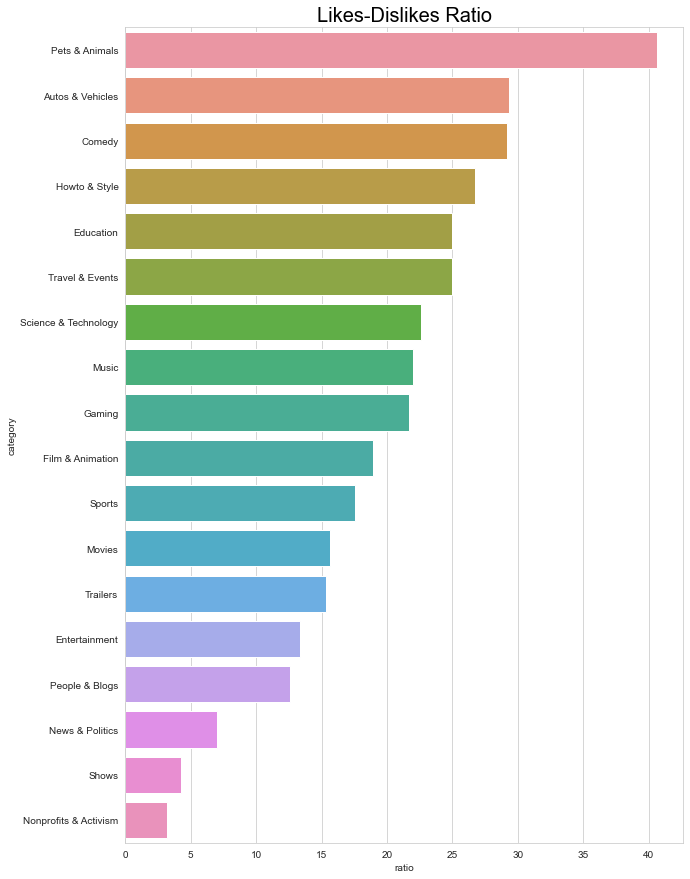

In [80]:
plot_ratios(like_dislike_ratio, 'Likes-Dislikes Ratio')

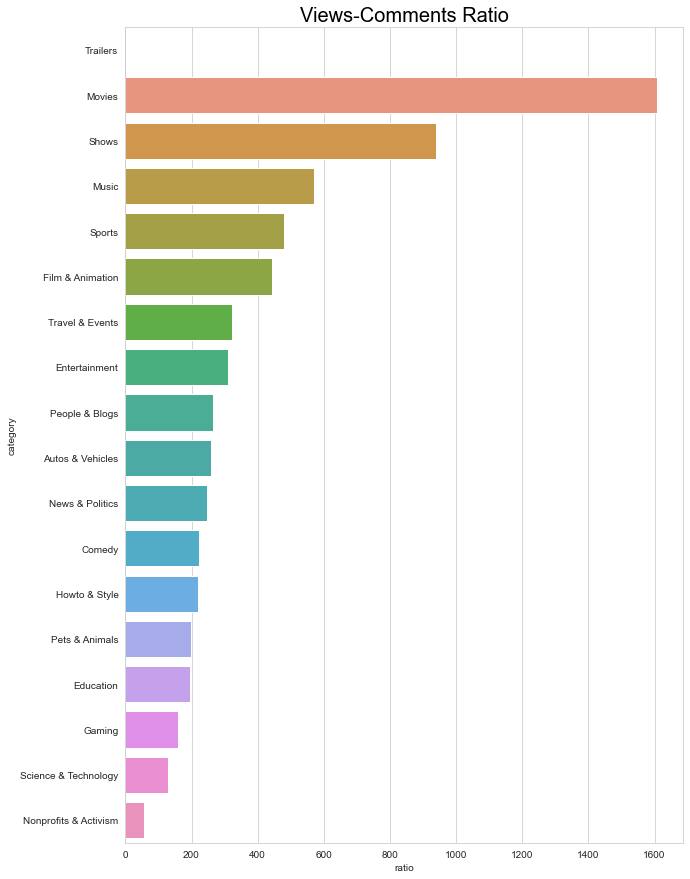

In [81]:
plot_ratios(views_comment_ratio, 'Views-Comments Ratio')

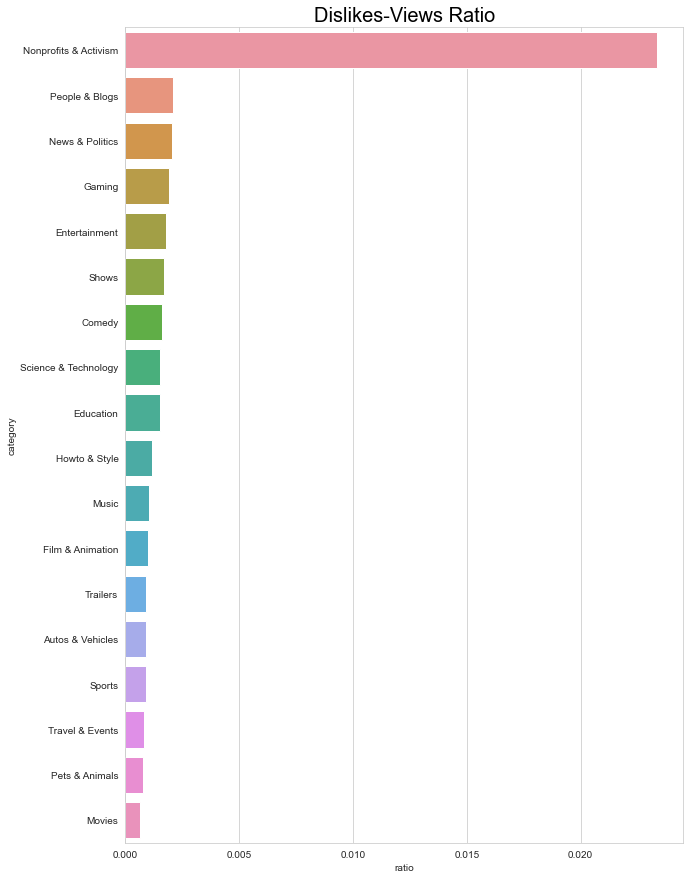

In [82]:
plot_ratios(view_dislike_ratio, 'Dislikes-Views Ratio')

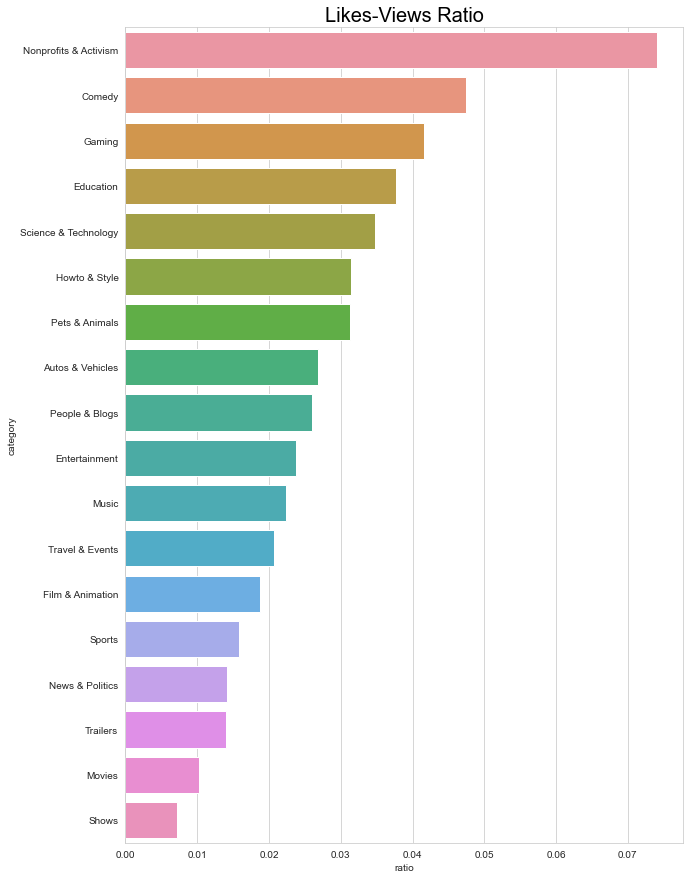

In [83]:
plot_ratios(view_like_ratio, 'Likes-Views Ratio')

###### Maximum Trended videos with respect to the Country

In [84]:
def max_trended_video(cn):
    df_which_video_trended_maximum_days = youtube[(youtube['country'] == cn)].groupby(by=['video_id'], 
                                                                                      as_index=False).count().sort_values(by='title', 
                                                                                                                          ascending=False).head()

    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.barplot(x = df_which_video_trended_maximum_days['video_id'],
                     y = df_which_video_trended_maximum_days['trending_date'],
                     data = df_which_video_trended_maximum_days)

    plt.xlabel("Video Id")
    plt.ylabel("Count")
    plt.title("Top 5 Videos that trended maximum days in {}".format(cn))

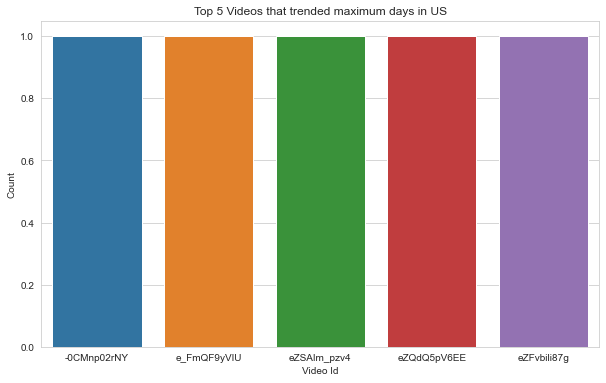

In [85]:
max_trended_video('US')

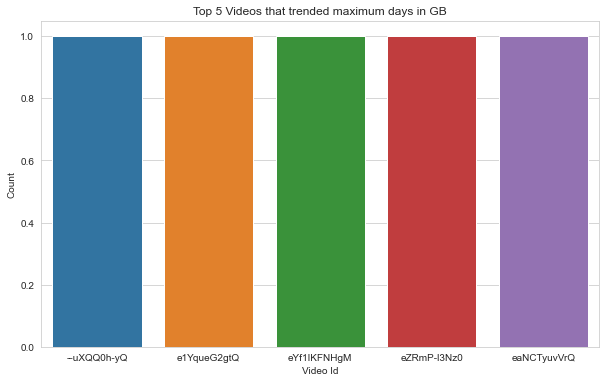

In [86]:
max_trended_video('GB')

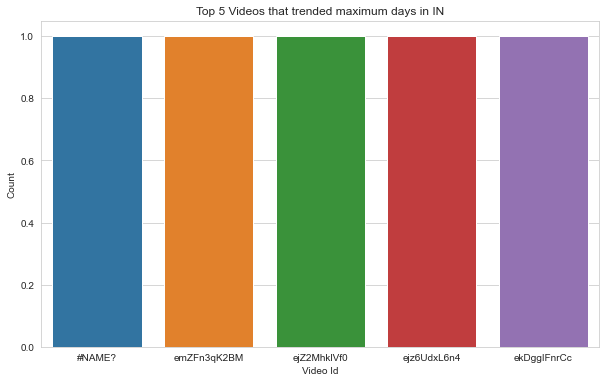

In [87]:
max_trended_video('IN')

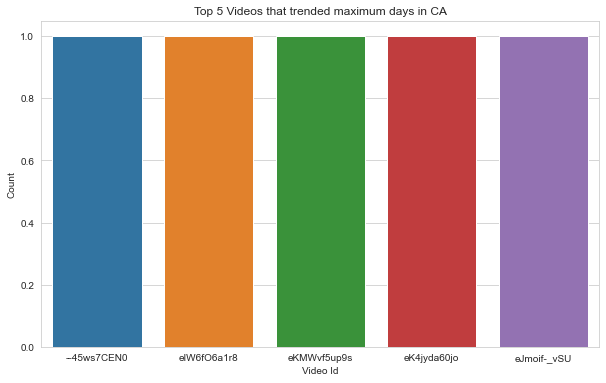

In [88]:
max_trended_video('CA')

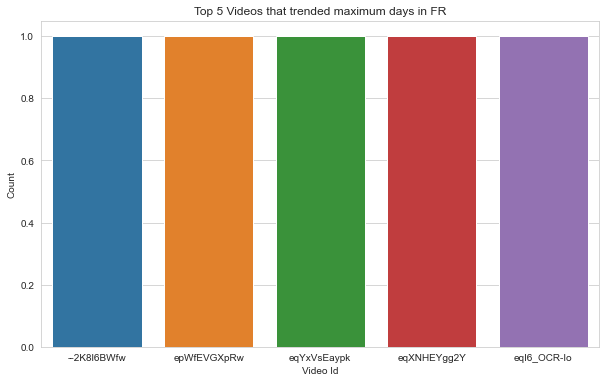

In [89]:
max_trended_video('FR')

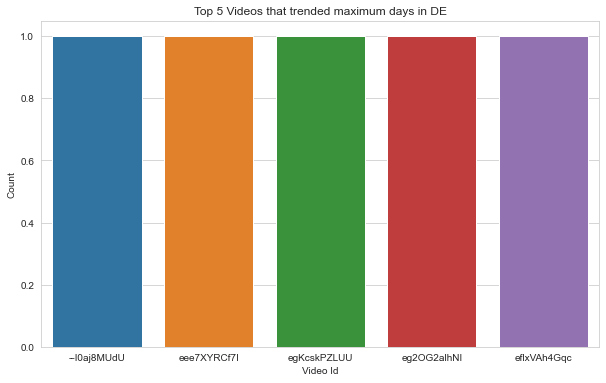

In [90]:
max_trended_video('DE')

###### Trending Channel with respect to the country

In [91]:
def trending_channel_in(cn, clr, cn_name):
    trending_channel = youtube[(youtube['country'] == cn)].groupby(by=['channel_title'],
                                                             as_index=False).count().sort_values(by='title',
                                                                                                 ascending=False).head()

    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.barplot(x = trending_channel['channel_title'],
                     y = trending_channel['video_id'], 
                     data = trending_channel,
                     color = clr)
    
    plt.xlabel("Channel Title")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.title("Top 5 Trending Channel in {}".format(cn_name))

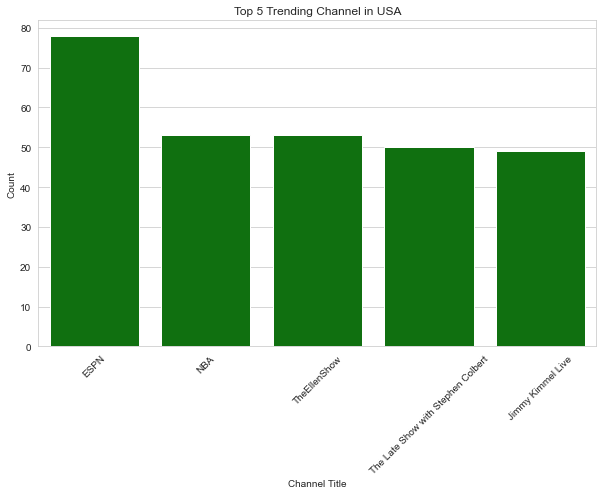

In [92]:
trending_channel_in('US', 'green', 'USA')

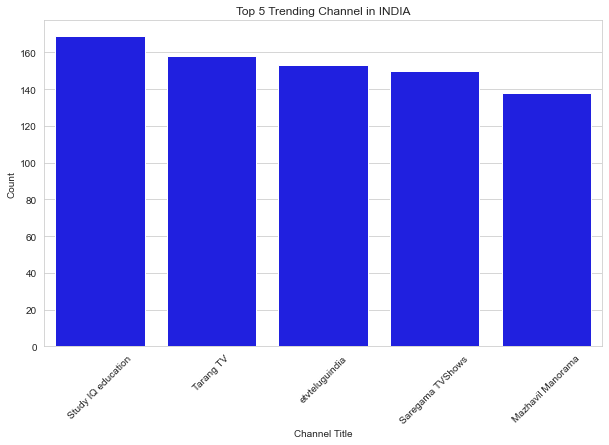

In [93]:
trending_channel_in('IN', 'blue', 'INDIA')

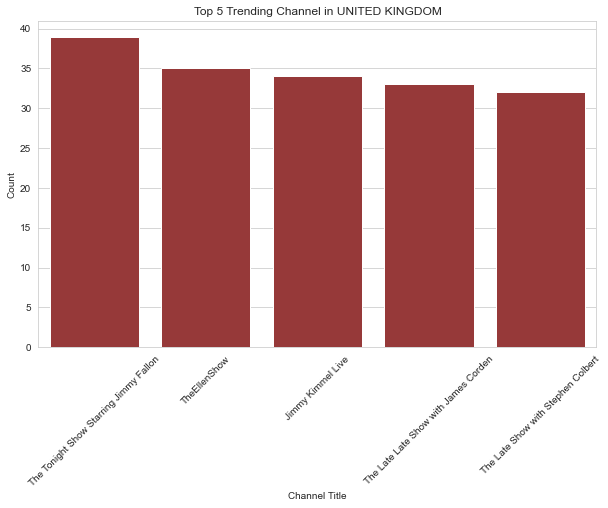

In [94]:
trending_channel_in('GB', 'brown', 'UNITED KINGDOM')

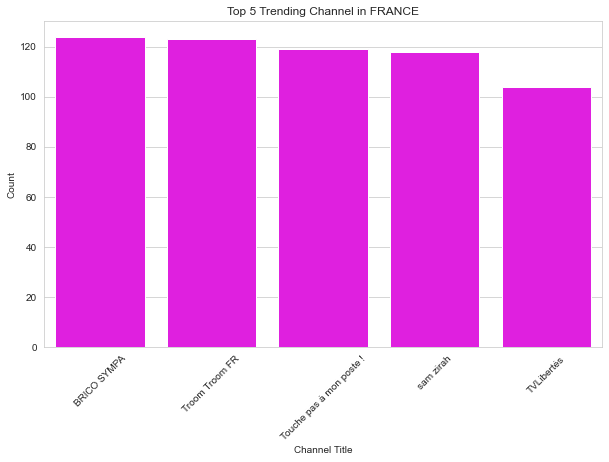

In [95]:
trending_channel_in('FR', 'magenta', 'FRANCE')

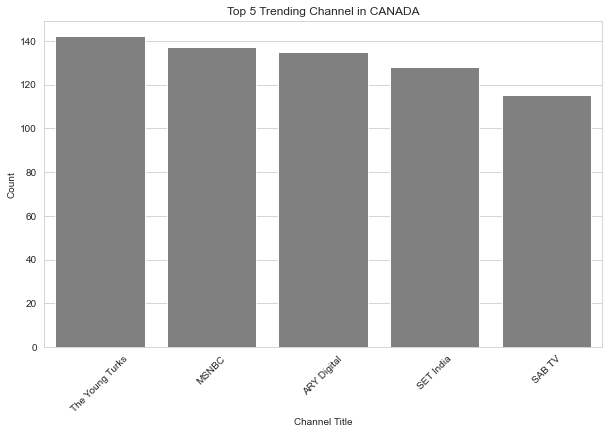

In [96]:
trending_channel_in('CA', 'grey', 'CANADA')

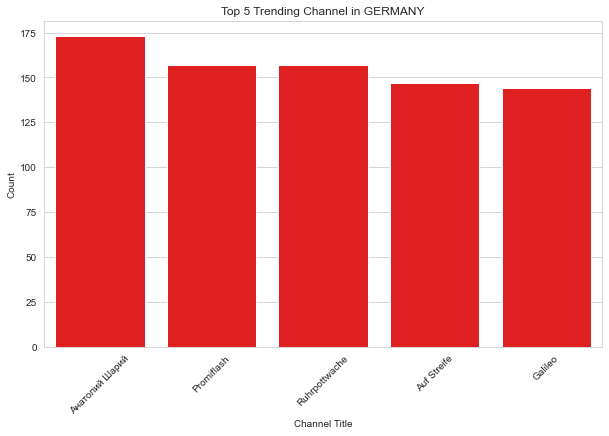

In [97]:
trending_channel_in('DE', 'red', 'GERMANY')

##### SENTIMENT ANALYSIS

In [98]:
youtube.head(3)

,video_id,trending_date,title,channel_title,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,video_error_or_removed,description,country,popular,like_percentage
0,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",12,7,4,5,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,One and a half years after the surgery that tr...,US,0,4.577220
1,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",14,9,5,6,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,James congratulates Jason Momoa on recently ma...,US,0,4.592833
2,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",12,8,6,7,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,With Justice League approaching fast we rewatc...,US,0,4.515966


In [99]:
youtube.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'video_error_or_removed', 'description', 'country', 'popular',
       'like_percentage'],
      dtype='object')

In [100]:
yt_sentiment = youtube.drop(['trending_date','publish_date', 'publish_time', 'views', 'likes', 'dislikes',
                             'comment_count','comments_disabled', 'video_error_or_removed', 'like_percentage'], axis=1)
yt_sentiment

,video_id,title,channel_title,category,tags,thumbnail_link,description,country,popular
0,IE-xepGLVt8,Mayo Clinic's first face transplant patient me...,Mayo Clinic,Science & Technology,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,One and a half years after the surgery that tr...,US,0
1,cOc3tsFWoRs,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,Entertainment,"James Corden|""The Late Late Show""|""Colbert""|""l...",https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,James congratulates Jason Momoa on recently ma...,US,0
2,Om_zGhJLZ5U,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,Film & Animation,"screenjunkies|""screen junkies""|""sj news""|""hone...",https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,With Justice League approaching fast we rewatc...,US,0
3,goP4Z5wyOlM,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,News & Politics,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,A strong 7.2-magnitude earthquake has rattled ...,US,0
4,k29YnfttqEU,Mean Tweets – Country Music Edition #3,Jimmy Kimmel Live,Comedy,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",https://i.ytimg.com/vi/k29YnfttqEU/default.jpg,"From time to time, we like to shine a light on...",US,0
...,...,...,...,...,...,...,...,...,...
92368,HMU2JUHEFmE,مسلسل وردة شامية _ بهية تتحايل على أم عزمي وت...,القناة الرسمية للفنانة زينة بارافي,People & Blogs,"زينة|""بارافي""|""ممثلة""|""قناة""|""رسمية""|""مشهد""|""د...",https://i.ytimg.com/vi/HMU2JUHEFmE/default.jpg,من مسلسل وردة شاميةلمتابعة العمل كاملاً :https...,DE,0
92369,YqNSdQpgrUk,Sadece 2 MALZEMEYLE Müthiş Güzel bir Tatlı Tar...,MASMAVİ3🔹MUTFAKTA,People & Blogs,tatlı tarifleri lokma tarifi yemek tarifleri k...,https://i.ytimg.com/vi/YqNSdQpgrUk/default.jpg,___İKİ MALZEMELİ SUN TATLISI____Bayramdan Sonr...,DE,0
92370,KAyj5Xm1C64,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,Entertainment,[none],https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,***I do NOT own anything. Just want to share t...,DE,0
92371,r5sOlv58s_k,180613 JIMIN & JUNGKOOK - 'Black Or White' Mic...,Jung Hyun Ran,People & Blogs,"bts|""방탄소년단""",https://i.ytimg.com/vi/r5sOlv58s_k/default.jpg,,DE,0


In [101]:
yt_sentiment.shape

(92373, 9)

In [102]:
yt_sentiment.columns

Index(['video_id', 'title', 'channel_title', 'category', 'tags',
       'thumbnail_link', 'description', 'country', 'popular'],
      dtype='object')

In [103]:
yt_sentiment.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92373 entries, 0 to 92372
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        92373 non-null  object
 1   title           92373 non-null  object
 2   channel_title   92373 non-null  object
 3   category        92373 non-null  object
 4   tags            92373 non-null  object
 5   thumbnail_link  92373 non-null  object
 6   description     92373 non-null  object
 7   country         92373 non-null  object
 8   popular         92373 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 235.3 MB


###### Word Frequency Count in Columns --  title, tags, description

In [104]:
def plot_wordcloud(cleaned_data, tit):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = 'black', max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(cleaned_data))
    
    # displaying the title
    plt.title("{} in WordCloud".format(tit), 
              fontsize=20, color="black")
    
    plt.imshow(wc)
    plt.axis('off')

def word_freq_count(column, text_name):
    
    #top N values to be taken 
    top_N = 100

    #convert list of list into text
    #lower_lst =''.join(str(r) for v in yt_sentiment[column] for r in v)

    lower_lst = yt_sentiment[column].str.lower().str.cat(sep=' ')

    # removes punctuation,numbers and returns list of words
    punct = re.sub('[^A-Za-z]+', ' ', lower_lst)

    #remove all the stopwords from the text
    stop_words = list(get_stop_words('en'))         
    nltk_words = list(stopwords.words('english'))   
    stop_words.extend(nltk_words)

    word_tokens = word_tokenize(punct)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    # Remove characters which have length less than 2  
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]
    
    # Remove numbers
    cleaned_text = [word for word in without_single_chr if not word.isnumeric()]
    
    # Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_text)
    rslt = pd.DataFrame(word_dist.most_common(top_N), 
                        columns=['Word', 'Frequency'])

    #plotting frequency distribution dataframe
    plt.figure(figsize=(10, 10))
    sns.set_style("whitegrid")
    ax = sns.barplot(x="Word", y="Frequency", data = rslt.head(7))
    plt.title(text_name)
    
    plot_wordcloud(cleaned_text, text_name)

###### column - title

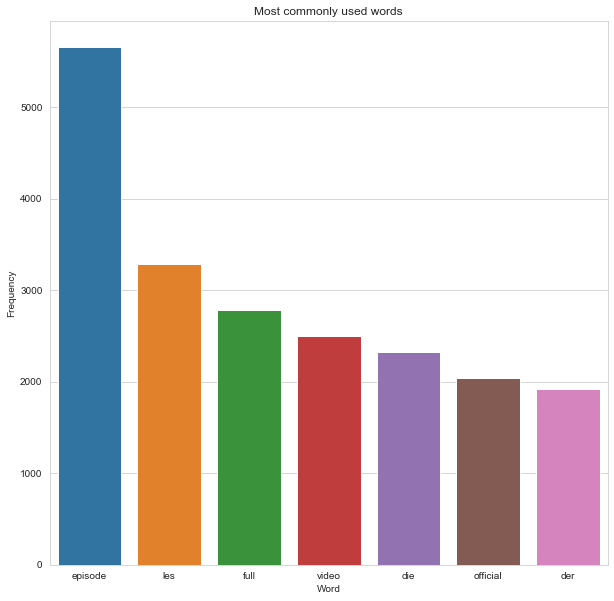

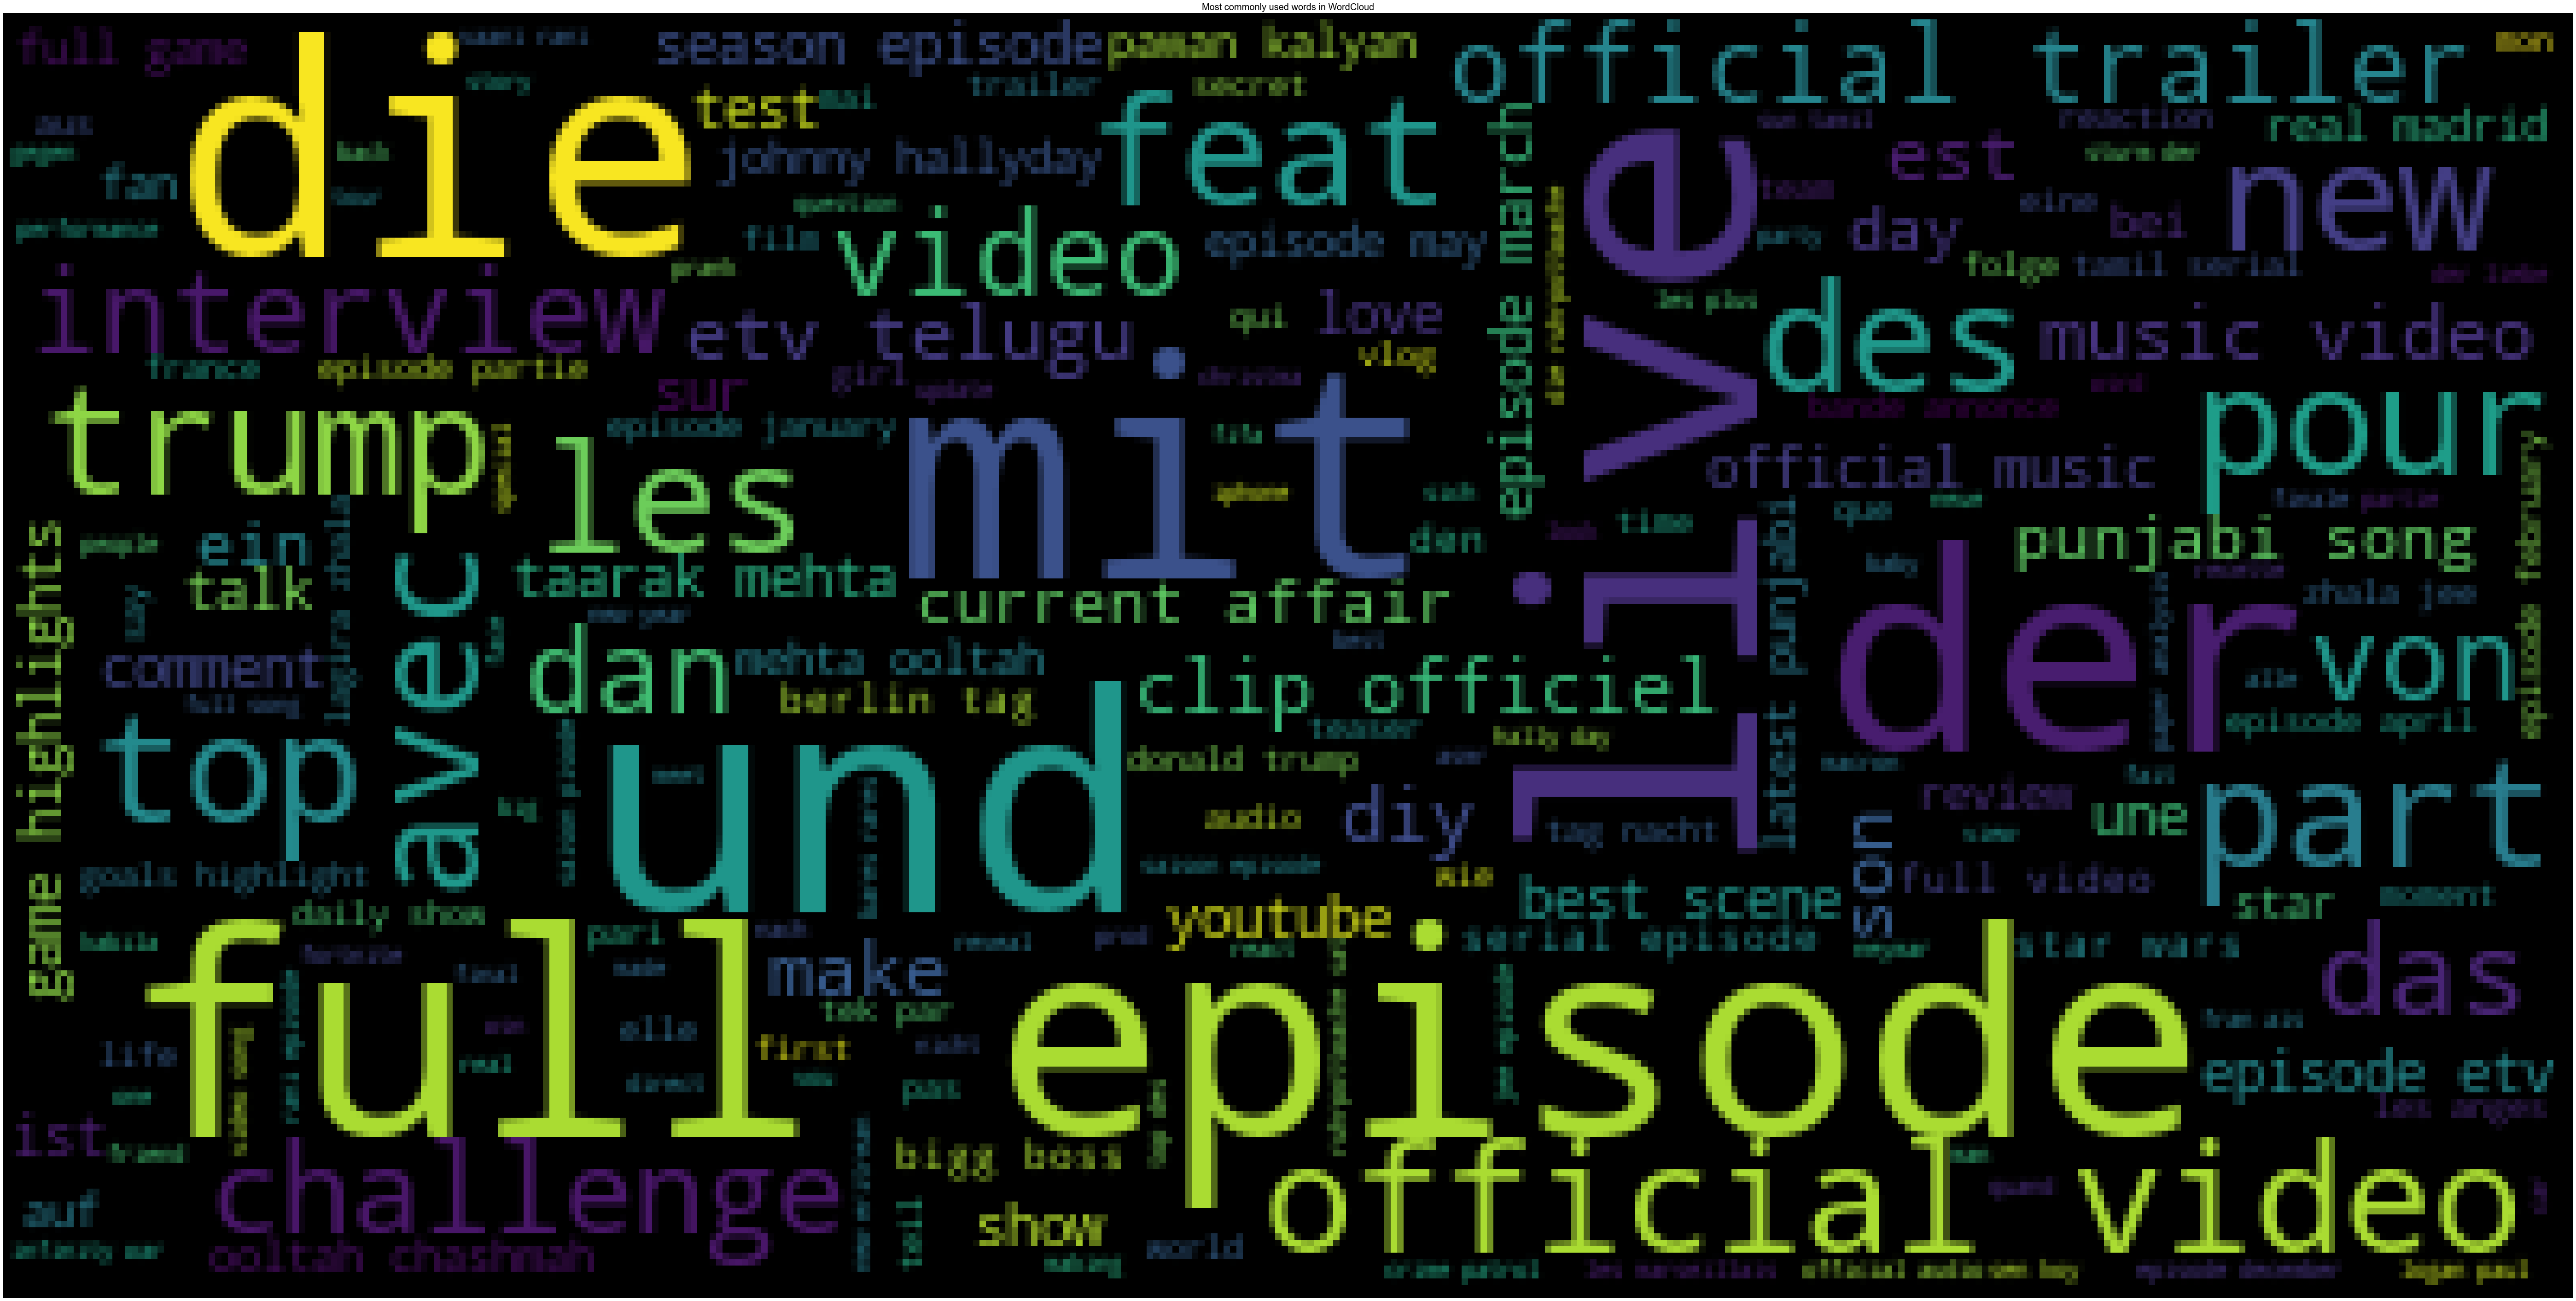

In [105]:
#title
word_freq_count('title', 'Most commonly used words')

###### column - tags

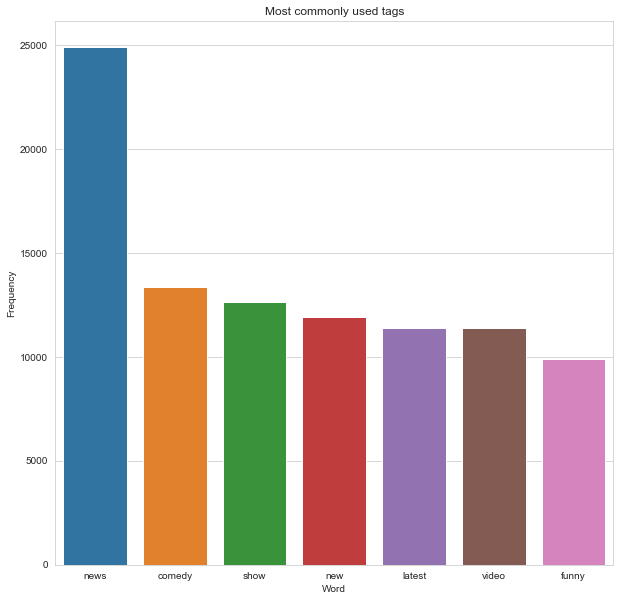

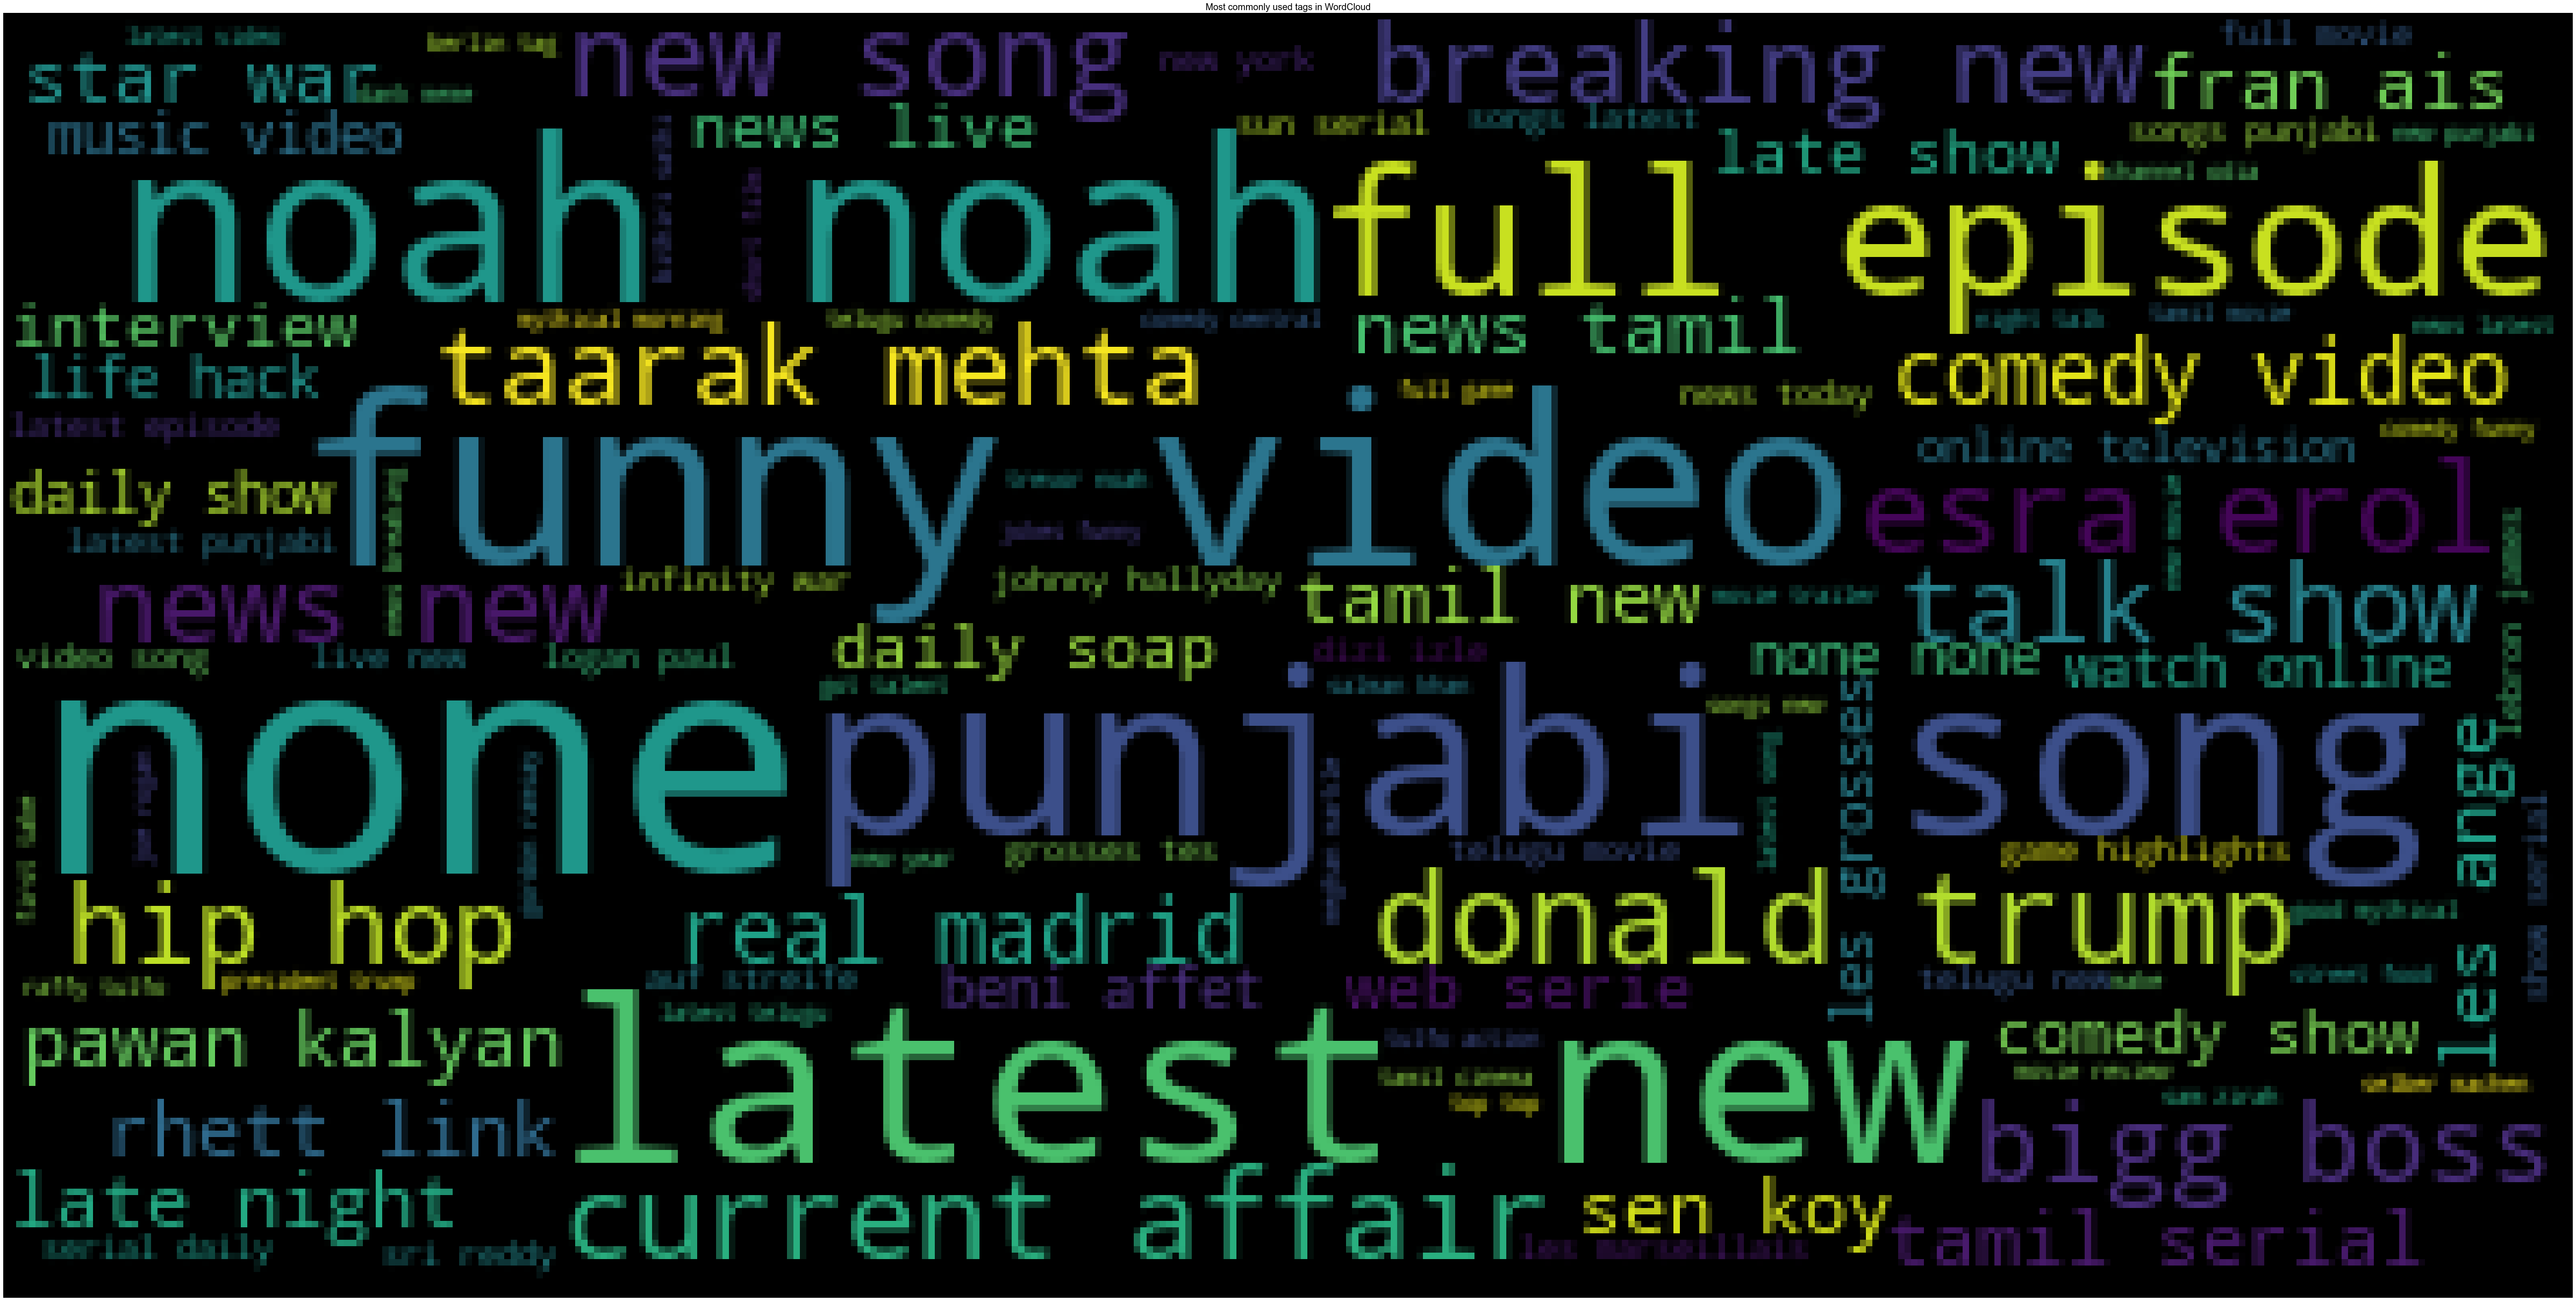

In [106]:
#tags
word_freq_count('tags', 'Most commonly used tags')

###### column - description

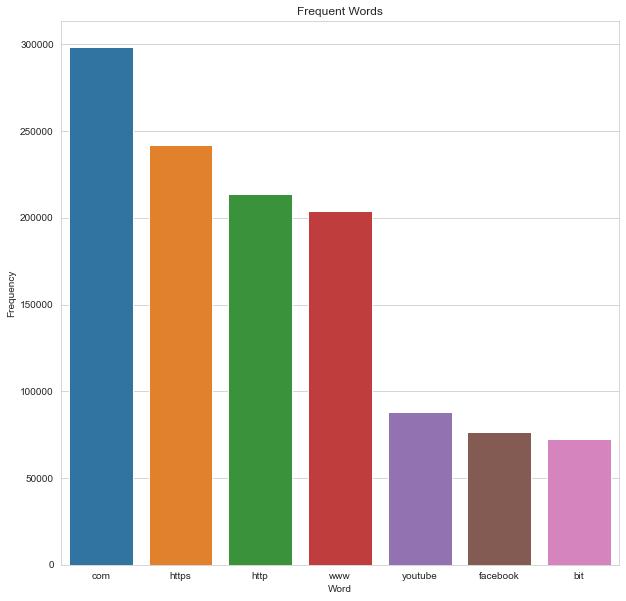

In [107]:
def word_freq_count(column, text_name):
    
    #top N values to be taken 
    top_N = 100

    #convert list of list into text
    #lower_lst =''.join(str(r) for v in yt_sentiment[column] for r in v)

    lower_lst = yt_sentiment[column].str.lower().str.cat(sep=' ')

    # removes punctuation,numbers and returns list of words
    punct = re.sub('[^A-Za-z]+', ' ', lower_lst)

    #remove all the stopwords from the text
    stop_words = list(get_stop_words('en'))         
    nltk_words = list(stopwords.words('english'))   
    stop_words.extend(nltk_words)

    word_tokens = word_tokenize(punct)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    # Remove characters which have length less than 2  
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]
    
    # Remove numbers
    cleaned_text = [word for word in without_single_chr if not word.isnumeric()]
    
    # Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_text)
    rslt = pd.DataFrame(word_dist.most_common(top_N), 
                        columns=['Word', 'Frequency'])

    #plotting frequency distribution dataframe
    plt.figure(figsize=(10, 10))
    sns.set_style("whitegrid")
    ax = sns.barplot(x="Word", y="Frequency", data = rslt.head(7))
    plt.title(text_name)
    

word_freq_count('description', 'Frequent Words')

###### Data Cleaning based on NLP techniques

In [108]:
yt_sentiment = yt_sentiment.drop(['video_id','channel_title', 'category', 'thumbnail_link', 'country'], axis=1)
yt_sentiment.head(4)

,title,tags,description,popular
0,Mayo Clinic's first face transplant patient me...,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",One and a half years after the surgery that tr...,0
1,Jason Momoa & Lisa Bonet: Love at First Sight,"James Corden|""The Late Late Show""|""Colbert""|""l...",James congratulates Jason Momoa on recently ma...,0
2,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,0
3,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,0


In [109]:
#changing data type of text
yt_sentiment['title'] = yt_sentiment['title'].astype('string')
yt_sentiment['tags'] = yt_sentiment['tags'].astype('string')
yt_sentiment['description'] = yt_sentiment['description'].astype('string')
yt_sentiment['popular'] = yt_sentiment['popular'].astype('float64')

yt_sentiment.dtypes

title           string
tags            string
description     string
popular        float64
dtype: object

In [110]:
#changing contraction verb
def change_contraction_verb(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

#removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#removing HTML tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

#removing emojis
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#removing punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

#remove custom text
def custom_preprocessor(text):
    text = text.lower() #lowercase
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def lemmatizing(text):
    sentence_words = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemma_noun = []
    for word_noun in sentence_words:
        lemma_noun.append(lemmatizer.lemmatize(word_noun,"n"))
        lemma_noun.append(" ")
    return "".join(lemma_noun)

In [111]:
#cleaning dataset

yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : change_contraction_verb(x))
yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : remove_html(x))
#yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : remove_punct(x))
yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : lemmatizing(x))
yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : custom_preprocessor(x))
yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : remove_emoji(x))
yt_sentiment['title'] = yt_sentiment['title'].apply(lambda x : remove_URL(x))

yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : change_contraction_verb(x))
yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : remove_html(x))
#yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : remove_punct(x))
yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : lemmatizing(x))
yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : custom_preprocessor(x))
yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : remove_emoji(x))
yt_sentiment['description'] = yt_sentiment['description'].apply(lambda x : remove_URL(x))

In [112]:
yt_sentiment['title'].head(4)

0    mayo clinic is first face transplant patient m...
1      jason momoa   lisa bonet   love at first sight 
2    tl   dw   every dceu movie before justice league 
3    iraq iran earthquake   deadly tremor hit borde...
Name: title, dtype: object

In [113]:
yt_sentiment['tags'].head(4)

0    Mayo Clinic|"Health Care (Issue)"|"Healthcare ...
1    James Corden|"The Late Late Show"|"Colbert"|"l...
2    screenjunkies|"screen junkies"|"sj news"|"hone...
3    bbc|"bbc news"|"news"|"iran"|"iran news"|"iraq...
Name: tags, dtype: string

In [114]:
yt_sentiment['description'].head(4)

0    one and a half year after the surgery that tra...
1    james congratulates jason momoa on recently ma...
2    with justice league approaching fast we rewatc...
3    a strong   magnitude earthquake ha rattled the...
Name: description, dtype: object

###### BUILDING MODEL AND EVALUATION

In [115]:
stopwords = stopwords.words('english')

###### for description

In [116]:
#tf-idf calculation

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2), stop_words = stopwords)
vectors = tfidf.fit_transform(yt_sentiment['description'])
#print(tfidf.get_feature_names())

In [117]:
#classifier
clf = LogisticRegression(C=1.0)

In [118]:
# Fitting a simple Logistic Regression on Counts
clf.fit(vectors, yt_sentiment["popular"])

LogisticRegression()

In [119]:
#accuracy scores
scores = model_selection.cross_val_score(clf, vectors, yt_sentiment["popular"], cv=5, scoring="f1")
print(scores)

[0.05619835 0.08780488 0.08482871 0.05342237 0.07843137]


###### for title

In [120]:
#tf-idf calculation

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2), stop_words = stopwords)
vectors1 = tfidf.fit_transform(yt_sentiment['title'])
#print(tfidf.get_feature_names())

In [121]:
#classifier
clf1 = LogisticRegression(C=1.0)

In [122]:
# Fitting a simple Logistic Regression on Counts
clf1.fit(vectors1, yt_sentiment["popular"])

LogisticRegression()

In [123]:
#accuracy scores
scores = model_selection.cross_val_score(clf1, vectors1, yt_sentiment["popular"], cv=5, scoring="f1")
print(scores)

[0.03395586 0.01712329 0.02054795 0.03691275 0.04047218]


###### for tags

In [124]:
#tf-idf calculation

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2), stop_words = stopwords)
vectors2 = tfidf.fit_transform(yt_sentiment['tags'])
#print(tfidf.get_feature_names())

In [125]:
#classifier
clf2 = LogisticRegression(C=1.0)

In [126]:
# Fitting a simple Logistic Regression on Counts
clf2.fit(vectors2, yt_sentiment["popular"])

LogisticRegression()

In [127]:
#accuracy scores
scores = model_selection.cross_val_score(clf2, vectors2, yt_sentiment["popular"], cv=5, scoring="f1")
print(scores)

[0.04721754 0.05685619 0.05378151 0.03056027 0.04384486]


###### Categorize the description column into Positive and Negative sentiments using TextBlob

COLUMN :- description

In [128]:
yt_sentiment.columns

Index(['title', 'tags', 'description', 'popular'], dtype='object')

In [129]:
desc_sentiment = yt_sentiment.drop(['title', 'tags'], axis=1)
desc_sentiment

,description,popular
0,one and a half year after the surgery that tra...,0.0
1,james congratulates jason momoa on recently ma...,0.0
2,with justice league approaching fast we rewatc...,0.0
3,a strong magnitude earthquake ha rattled the...,0.0
4,from time to time we like to shine a light o...,0.0
...,...,...
92368,من مسلسل وردة شاميةلمتابعة العمل كاملا http...,0.0
92369,___i ki malzemeli sun tatlisi____bayramdan s...,0.0
92370,i do not own anything just want to sha...,0.0
92371,,0.0


In [130]:
desc_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92373 entries, 0 to 92372
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  92373 non-null  object 
 1   popular      92373 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


####### TextBlob --- description

In [131]:
bloblist_col = list()
yt_sentiment_str = desc_sentiment['description'].astype(str)
    
for row in yt_sentiment_str:
    blob = TextBlob(row)
    #for translation
    #blob.translate(from_lang='ar', to ='en')
    bloblist_col.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    desc_polarity = pd.DataFrame(bloblist_col, columns = ['sentence','sentiment','polarity'])

In [132]:
def col_sentiment(desc_polarity):
    if desc_polarity['sentiment'] > 0: 
        val = "Positive"
    elif desc_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val


desc_polarity['Sentiment_Type'] = desc_polarity.apply(col_sentiment, axis=1)
desc_polarity

,sentence,sentiment,polarity,Sentiment_Type
0,one and a half year after the surgery that tra...,-0.166667,0.166667,Negative
1,james congratulates jason momoa on recently ma...,0.005841,0.513050,Positive
2,with justice league approaching fast we rewatc...,0.111111,0.472222,Positive
3,a strong magnitude earthquake ha rattled the...,0.047619,0.361905,Positive
4,from time to time we like to shine a light o...,0.105448,0.542358,Positive
...,...,...,...,...
92368,من مسلسل وردة شاميةلمتابعة العمل كاملا http...,0.000000,0.000000,Neutral
92369,___i ki malzemeli sun tatlisi____bayramdan s...,0.000000,0.000000,Neutral
92370,i do not own anything just want to sha...,-0.300000,1.000000,Negative
92371,,0.000000,0.000000,Neutral


In [133]:
def plot_sentiments(col):
    
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.countplot(x = "Sentiment_Type", data = desc_polarity,
                       facecolor = (0, 0, 0, 0), linewidth = 5, 
                       edgecolor = sns.color_palette("dark", 3))
    #to increase x ticks 
    plt.xticks(size=15)

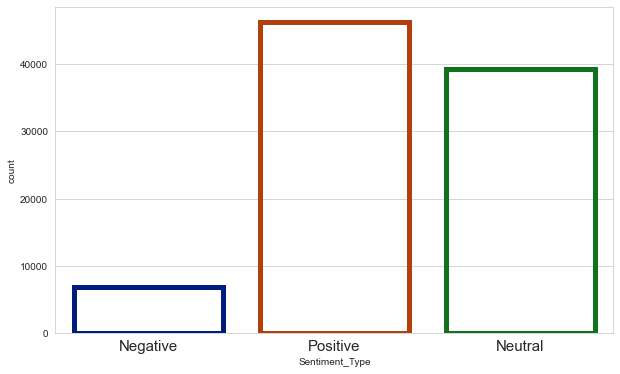

In [134]:
plot_sentiments('description')

COLUMN :- title

In [135]:
yt_sentiment.columns

Index(['title', 'tags', 'description', 'popular'], dtype='object')

In [136]:
tit_sentiment = yt_sentiment.drop(['description', 'tags'], axis=1)
tit_sentiment

,title,popular
0,mayo clinic is first face transplant patient m...,0.0
1,jason momoa lisa bonet love at first sight,0.0
2,tl dw every dceu movie before justice league,0.0
3,iraq iran earthquake deadly tremor hit borde...,0.0
4,mean tweets country music edition,0.0
...,...,...
92368,مسلسل وردة شامية _ بهية تتحايل على أم عزمي وتن...,0.0
92369,sadece malzemeyle müthiş güzel bir tatlı tari...,0.0
92370,bts prom party intro grand random play ...,0.0
92371,jimin jungkook black or white michael ...,0.0


In [137]:
tit_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92373 entries, 0 to 92372
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    92373 non-null  object 
 1   popular  92373 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


####### TextBlob --- title

In [138]:
bloblist_col = list()
yt_sentiment_str = tit_sentiment['title'].astype(str)
    
for row in yt_sentiment_str:
    blob = TextBlob(row)
    #for translation
    #blob.translate(from_lang='ar', to ='en')
    bloblist_col.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    tit_polarity = pd.DataFrame(bloblist_col, columns = ['sentence','sentiment','polarity'])

In [139]:
def col_sentiment(tit_polarity):
    if tit_polarity['sentiment'] > 0: 
        val = "Positive"
    elif tit_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val


tit_polarity['Sentiment_Type'] = tit_polarity.apply(col_sentiment, axis=1)
tit_polarity

,sentence,sentiment,polarity,Sentiment_Type
0,mayo clinic is first face transplant patient m...,0.250000,0.333333,Positive
1,jason momoa lisa bonet love at first sight,0.375000,0.466667,Positive
2,tl dw every dceu movie before justice league,0.000000,0.000000,Neutral
3,iraq iran earthquake deadly tremor hit borde...,-0.200000,0.400000,Negative
4,mean tweets country music edition,-0.312500,0.687500,Negative
...,...,...,...,...
92368,مسلسل وردة شامية _ بهية تتحايل على أم عزمي وتن...,0.000000,0.000000,Neutral
92369,sadece malzemeyle müthiş güzel bir tatlı tari...,0.000000,0.000000,Neutral
92370,bts prom party intro grand random play ...,0.000000,0.750000,Neutral
92371,jimin jungkook black or white michael ...,-0.083333,0.216667,Negative


In [140]:
def plot_sentiments(col):
    
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.countplot(x = "Sentiment_Type", data = tit_polarity,
                       facecolor = (0, 0, 0, 0), linewidth = 5, 
                       edgecolor = sns.color_palette("dark", 3))
    #to increase x ticks 
    plt.xticks(size=15)

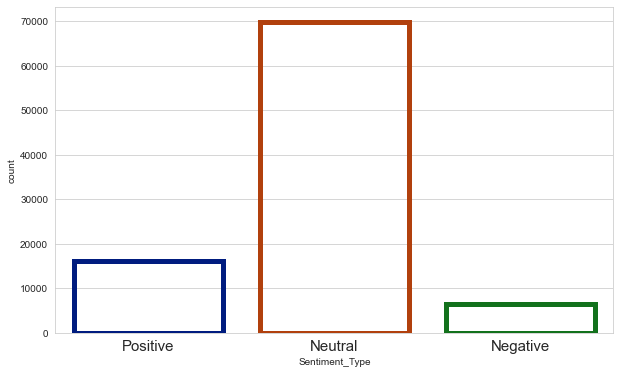

In [141]:
plot_sentiments('title')

COLUMN :- tags

In [142]:
yt_sentiment.columns

Index(['title', 'tags', 'description', 'popular'], dtype='object')

In [143]:
tag_sentiment = yt_sentiment.drop(['title', 'description'], axis=1)
tag_sentiment

,tags,popular
0,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",0.0
1,"James Corden|""The Late Late Show""|""Colbert""|""l...",0.0
2,"screenjunkies|""screen junkies""|""sj news""|""hone...",0.0
3,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",0.0
4,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",0.0
...,...,...
92368,"زينة|""بارافي""|""ممثلة""|""قناة""|""رسمية""|""مشهد""|""د...",0.0
92369,tatlı tarifleri lokma tarifi yemek tarifleri k...,0.0
92370,[none],0.0
92371,"bts|""방탄소년단""",0.0


In [144]:
tag_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92373 entries, 0 to 92372
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tags     92373 non-null  string 
 1   popular  92373 non-null  float64
dtypes: float64(1), string(1)
memory usage: 1.4 MB


####### TextBlob --- tags

In [145]:
bloblist_col = list()
yt_sentiment_str = tag_sentiment['tags'].astype(str)
    
for row in yt_sentiment_str:
    blob = TextBlob(row)
    #for translation
    #blob.translate(from_lang='ar', to ='en')
    bloblist_col.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    tag_polarity = pd.DataFrame(bloblist_col, columns = ['sentence','sentiment','polarity'])

In [146]:
def col_sentiment(tag_polarity):
    if tag_polarity['sentiment'] > 0: 
        val = "Positive"
    elif tag_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val


tag_polarity['Sentiment_Type'] = tag_polarity.apply(col_sentiment, axis=1)
tag_polarity

,sentence,sentiment,polarity,Sentiment_Type
0,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",-0.100000,0.100000,Negative
1,"James Corden|""The Late Late Show""|""Colbert""|""l...",-0.055000,0.760000,Negative
2,"screenjunkies|""screen junkies""|""sj news""|""hone...",0.600000,0.900000,Positive
3,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",0.000000,0.000000,Neutral
4,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",-0.026705,0.498438,Negative
...,...,...,...,...
92368,"زينة|""بارافي""|""ممثلة""|""قناة""|""رسمية""|""مشهد""|""د...",0.000000,0.000000,Neutral
92369,tatlı tarifleri lokma tarifi yemek tarifleri k...,0.000000,0.000000,Neutral
92370,[none],0.000000,0.000000,Neutral
92371,"bts|""방탄소년단""",0.000000,0.000000,Neutral


In [147]:
def plot_sentiments(col):
    
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.countplot(x = "Sentiment_Type", data = tag_polarity,
                       facecolor = (0, 0, 0, 0), linewidth = 5, 
                       edgecolor = sns.color_palette("dark", 3))
    #to increase x ticks 
    plt.xticks(size=15)

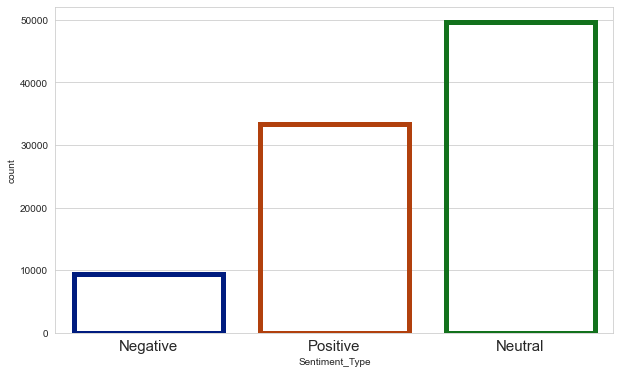

In [148]:
plot_sentiments('tags')

##### CONCLUSION

* Focussed libraries : nltk, textblob, seaborn, matplotlib, numpy, pandas


* Focussed analysis : Sentiment Analysis


* Choosen Countries for analysis :
    CA (Canada), DE (Germany), FR (France), GB (United Kingdom), IN (India), US (USA)


* What type of data we have in this datasets?
    
        1. More number of not trending videos than trending ones
        2. %age of each country available :- 
            ## US = 5.7
            ## IN = 16.4
            ## CA = 19.9
            ## DE = 26.4
            ## FR = 28.2
            ## GB = 3.4
        3. Trending Year : 2018
    
    
* Factors important for videos to get popular are :-

    1. views
    2. likes
    3. dislikes
    4. comments count
    
    
* Which country has the largest popular videos?

    1. GB
    2. CA
    3. US
    4. IN
    
    
* Which categories are important for the videos to get popular?

    1. Music
    2. Entertainment
    
    
* Categories with respect to country :- 

    1. Music, Entertainment : GB
    2. Entertainment, Howto and Style : US
    3. Entertainment, News & Politics : IN
    4. Entertainment, News & Politics : CA
    5. Entertainment, People & Blogs : DE
    6. Entertainment, People & Blogs : FR
    
    
* Total number of trending videos in each country :-

    1. GB = 746
    2. US = 616
    3. IN = 504
    4. CA = 611
    5. DE = 260 
    6. FR = 120
    
    
* Which ratio shows the categories to make the video popular?

    1. Likes-Dislikes Ratio => Pets & Animals, Autos & Vehicles
    2. Views-Comments Ratio => Trailers, Movies
    3. Views-Dislikes Ration => Nonprofit & Activism
    4. Likes-views Ratio => Nonprofit & Activism, Comedy
    
    
* The most trended videos (video_id) with respect to each country are :-

    1. US : -0CMnpO2rNY
    2. GB : -uXQQ0hy-Q
    3. IN : emZFn3qK2BM
    4. CA : -45ws7CEND
    5. FR : -2K816BWfw
    6. DE : -10aj8MUdU
    
    
* Most commonly used words 

        A) in title : episode
        B) in tags : news
        C) in description : com
      
      
* High Polarity  

        A) in title : Positive
        B) in tags : Neutral
        C) in description: Neutral
       
       
* What are the most trending channel in the chosen countries?

    1. US : ESPN
    2. GB : The tonight show starring Jimmy Fallon
    3. IN : Study IQ education
    4. CA : The Young Turks
    5. FR : BRICOSYMPA
    6. DE : Promiflash
    
    
######  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------